##### Copyright (C) 2022 Burak ÇELİK

In [29]:
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.

## __Ön Gereklilikler__

> __Bu uygulamayı Google Colab üzerinde görüntülemek İçin Öncelikle aşağıdaki hücreyi çalıştırıp `evdsts`'yi kurmanız gerekmektedir.__  

> __Eğer `evdsts` zaten sisteminizde kurulu ve bu dosyayı yerel Jupyter Notebook'unuzda görüntülüyorsanız herhangi bir kurulum yapmanıza gerek yoktur.__

In [ ]:
# Emin değilseniz test etmek için çalıştırabilirsiniz.
try:
    import evdsts
    print('evdsts zaten kurulu.')
except ModuleNotFoundError:
    print('evdsts kurulu degil. Asagidaki hücreyi isleterek evdsts\'yi kurmaniz gerekiyor.')
except Exception as ex:
    print('Bilinmeyen bir hata olustu ciktiyi inceleyin!')
    raise ex

In [ ]:
# eğer evdsts geçerli ortamda kurulu değilse kurulum yapar
%pip install evdsts

> __Bu örnek uygulamayı kullanabilmek için EVDS'den alınan size özel bir API Anahtarı'na ihtiyacınız vardır.
> Eğer daha önce API anahtarınızı almadıysanız aşağıdaki adımları izleyerek öncelikle anahtarınızı almalısınız.__

1. [__EVDS__](https://evds2.tcmb.gov.tr/index.php?/evds/login) web sitesini açın.
2. Açılan sayfada __KAYIT OLUN__ butonuna tiklayin.
3. Formda istenen bilgileri girip EVDS'ye kayıt olun.
4. Girdiginiz e-mail adresine ait olan gelen kutusunu kontrol edin ve gelen e-mail üzerinden e-mail adresinizi doğrulayın.
5. Ayni sayfayı açın ve hesabınıza giriş yapın.
6. Kullanıcı adınıza tıklayın ve açılır menüden __Profil__ sekmesine tıklayın.
7. Açılan menüde __API Anahtarı__ butonuna tıklayarak bağlantı için gereken API anahtarınızı gorebilirsiniz.

## __EVDSTS Örnek Senaryolar__

### 1. [__Connector Sınıfı Temelleri__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-basics-1)

Bu bölümde `evdsts`'nin `Connector` sınıfının bazı önemli özelliklerine göz atacağız. `Connector`, EVDS üzerinden
tüm veri alım işlemlerinden sorumlu sınıftır.

#### 1.1. [__Connector Sınıfının Import Edilmesi ve Bir Nesne Yaratılması__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#connector-instance)

`evdsts`'yi kullanrak EVDS'den veri indirebilmeniz için öncelikle `Connector` sınıfını projenize
import etmeniz gerekecek.

In [2]:
from evdsts import Connector

Daha sonra ise veri alım işlemlerini gerçekleştirebilmek için ise `Connector` sınıfına ait bir nesneye
ihtiyacınız olacak. Bunu aşağıdaki hücredeki gibi yapabilirsiniz. Bu örneklerde nesne ismi `connector`
olarak seçilmiştir fakat siz kendi projenizde farklı isimler de kullanabilirsiniz.

In [2]:
connector = Connector('API_ANAHTARINIZ')

`connector` nesnesi hakkında bazı detaytları görüntülemek için `print` edebilirsiniz.

In [ ]:
connector  # Bu, api anahtarını da görüntüleyeeği için hücre çalıştırılmamıştır.

`Connector` objesini yaratırken aşağıdaki parametreleri de kullanabilirsiniz:

In [ ]:
# basit obje yaratımı
connector = Connector('API_ANAHTARINIZ')

# connector'un baglanmaya calistigi url'yi gosterir.
connector = Connector('API_ANAHTARINIZ', show_links=True)

# proxy arkasindan baglanti
proxies = {"http": "127.0.0.1", "https": "127.0.0.1"}
connector = Connector('API_ANAHTARINIZ', proxy_server=proxies)

# Baglanilan server icin SSL guvenlik sertifikasi dogrulamasini devre disi birakir
connector = Connector('API_ANAHTARINIZ', verify_certificates=False)

# Daha iyi ekran goruntulemesi icin Jupyter Notebook Modu. Bu mod sadece ekranda goruntulenen
# veriyi etkiler, yani, icsel hesaplamalari etkilemez.
connector = Connector('API_ANAHTARINIZ', jupyter_mode=True)

# alinan tum veriler icin ondalik hane hassasiyetini 2 olarak secer. Bu hassasiyet hem ekranda
# goruntulenecek verilerin hem de hesaplamada kullanilacak verilerin ondalik hane hassasiyetini
# etkiler
connector = Connector('API_ANAHTARINIZ', precision=2)

#### 1.2. [__Gelecek Kullanımlar İçin API Anahtarınızı Diske Kaydetme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#save-the-key)

Aslında bir `Connector` nesnesi yaratmak için her seferinde API anahtarınızı kullanmanıza gerek yok.
Mevcut API anahtarınızı proje klasörüne kopyalarak, bu proje içinde anahtara gerek kalmadan herhangi
bir yerde `Connector` nesnesi yaratabilirsiniz. Bunun için `save_key()` metodunu kullanırız.

In [ ]:
connector = Connector('API_ANAHTARINIZ')
connector.save_key()  # bu noktadan sonra mevcut projeniz içinde artık api anahtarınızı kullanmanıza gerek yok.

Böylece aşağıdaki şekilde API anahtarınızı kullanmaya gerek kalmadan bir `Connector` nesnesi oluşturabilirsiniz.

In [3]:
connector = Connector()  # burada API anahtarınız diskten okunuyor.

#### 1.3. [__EVDS Seri İsim Tanımlarını Veri Tabanında Arama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#searching-into-database)

Aradığınız serilerin EVDS'de tanımlı isminin ne olduğunu bulmak için `evdsts` içinden çıkmanıza gerek yok!
`evdsts`'nin `where()` metodu sayesinde EVDS'nin web sitesini ziyaret etmenize ve site üzerinde arama yapmanız
gerek kalmaksızın seri isim tanımı arayabilirsiniz.

In [8]:
connector = Connector()                  # API anahtarinizi diske kayit ettiginizi varsayiyoruz.
connector.where("tüketici fiyat endeksi"); # arama yaklasik 0.5 sn. aldi.

5 most relevant results for 'tüketici fiyat endeksi' are shown below.

                                                 Search Results                                                 
----------------------------------------------------------------------------------------------------------------
Series Code          Series Name                                                     Frequency        Start Date 
----------------------------------------------------------------------------------------------------------------
TP.FE.OKTG01         Tüketici Fiyat Endeksi (Genel)                                  AYLIK            01-01-2003 
TP.MK.F.BILESIK.TUM  (FİYAT) BİST Tüm-100 Endeksi (XTUMY), Kapanış Fiyatlarına Göre  İŞ GÜNÜ          02-01-2009 
TP.MK.F.HIZMET       (FİYAT) BİST Hizmet Endeksi (XUHIZ), Kapanış Fiyatlarına Göre ( İŞ GÜNÜ          02-01-1997 
TP.MK.F.TEKNOLOJI    (FİYAT) BİST Teknoloji Endeksi (XUTEK), Kapanış Fiyatlarına Gör İŞ GÜNÜ          30-06-2000 
TP.TUFE1YI.T1       

Yuakrıdaki çıktıdaki `Series Code` sütunu size EVDS'den veri indirmek için gereken seri isim tanımını verecektir.
Bu çıktı sonuçlarda herhangi bir limit olmaksızın ayrıca bir `Dict` nesnesi olarak da geri döndürülür ve bir değişkene
atanabilir.

In [76]:
# Tum arama sonuclari herhangi bir sonuc sayisi siniri olmaksizin 'all_results' degiskenine atandi.
# 'all_results' 'Dict[Series Code, List[Series Name, Series Frequency, Series Start Date]] kimlikli
# bir Python 'Dict' nesnesidir.

all_results = connector.where("tüketici fiyat endeksi", verbose=False)

In [78]:
from pprint import pprint # Daha düzgün bir Dict gösterimi için

pprint(all_results)

{'TP.FE.OKTG01': ['Tüketici Fiyat Endeksi (Genel)', 'AYLIK', '01-01-2003'],
 'TP.MK.F.BILESIK.TUM': ['(FİYAT) BİST Tüm-100 Endeksi (XTUMY), Kapanış '
                         'Fiyatlarına Göre',
                         'İŞ GÜNÜ',
                         '02-01-2009'],
 'TP.MK.F.HIZMET': ['(FİYAT) BİST Hizmet Endeksi (XUHIZ), Kapanış Fiyatlarına '
                    'Göre (27-12-1996=10,46)',
                    'İŞ GÜNÜ',
                    '02-01-1997'],
 'TP.MK.F.TEKNOLOJI': ['(FİYAT) BİST Teknoloji Endeksi (XUTEK), Kapanış '
                       'Fiyatlarına Göre (30-06-2000=144,6612)',
                       'İŞ GÜNÜ',
                       '30-06-2000'],
 'TP.TUFE1YI.T1': ['1.Yurt İçi Üretici Fiyat Endeksi', 'AYLIK', '01-01-1982']}


Başka bir örnek için;

In [94]:
connector.where("bankalar döviz mevduatı");

5 most relevant results for 'bankalar döviz mevduatı' are shown below.

                                                 Search Results                                                 
----------------------------------------------------------------------------------------------------------------
Series Code          Series Name                                                     Frequency        Start Date 
----------------------------------------------------------------------------------------------------------------
TP.AB.A14            P.1bb-Bankalar Döviz Mevduatı(Bin TL)                           İŞ GÜNÜ          26-12-1980 
TP.PPIBSM            Bankalar Serbest Mevduatı(Milyon TL)                            İŞ GÜNÜ          04-01-2007 
TP.AB.A13            P.1ba-Kamu ve Diğer Döviz Mevduatı(Bin TL)                      İŞ GÜNÜ          26-12-1980 
TP.AB.A18            P.2Ab-Bankalar Mevduatı(Bin TL)                                 İŞ GÜNÜ          26-12-1980 
TP.AB.N09          

#### 1.4. [__EVDS Üzerindeki Ana Veri Kategorilerini Listeleme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#listing-main-cat)

EVDS veritabanı üzerindeki tüm ana veri kategorilerini listelemek için `get_main_categories()` metodunu
kullanabilirsiniz. Metotdan dönen veri türü ön tanımlı olarak `DataFrame` olsa da ana kategorileri `Dict`
ya da `JSON` nesleri olarak da isteyebilirsiniz.

In [10]:
main_categories = connector.get_main_categories()

In [11]:
main_categories

,CATEGORY_ID,TOPIC_TITLE_TR
Index,,
0,1,PİYASA VERİLERİ
1,2,KURLAR
2,3,FAİZ İSTATİSTİKLERİ
3,4,PARA VE BANKA İSTATİSTİKLERİ
4,5,MENKUL KIYMET İSTATİSTİKLERİ
5,12,FİNANSAL İSTATİSTİKLER
6,13,TCMB BİLANÇO VERİLERİ
7,14,FİYAT ENDEKSLERİ
8,15,ANKETLER


Ana kategorileri; `as_dict` parametresi ile `Dict` ve `raw` parametresi ile de `JSON` string olarak isteyebilirsiniz.

In [4]:
# dictionary
main_dict = connector.get_main_categories(as_dict=True)

# JSON string
main_raw = connector.get_main_categories(raw=True)

In [5]:
main_dict

{1: 'PİYASA VERİLERİ',
 2: 'KURLAR',
 3: 'FAİZ İSTATİSTİKLERİ',
 4: 'PARA VE BANKA İSTATİSTİKLERİ',
 5: 'MENKUL KIYMET İSTATİSTİKLERİ',
 12: 'FİNANSAL İSTATİSTİKLER',
 13: 'TCMB BİLANÇO VERİLERİ',
 14: 'FİYAT ENDEKSLERİ',
 15: 'ANKETLER',
 18: 'ÖDEMELER DENGESİ, ULUSLARARASI YATIRIM POZİSYONU',
 19: 'DIŞ TİCARET İSTATİSTİKLERİ',
 20: 'KAMU MALİYESİ',
 21: 'ÜRETİM',
 22: 'ÖDEME SİSTEMLERİ VE EMİSYON',
 23: 'İSTİHDAM',
 6: 'DIŞ BORÇLAR',
 7: 'ZORUNLU KARŞILIĞA TABİ MEVDUAT VE KATILIM FONLARI',
 24: 'BIS KARŞILAŞTIRMALI ÜLKE İSTATİSTİKLERİ',
 25: 'ALTIN VERİLERİ',
 26: 'KONUT VE İNŞAAT İSTATİSTİKLERİ',
 27: 'FİNANSAL HESAPLAR',
 28: 'TURİZM İSTATİSTİKLERİ',
 95: 'EVDS KULLANIM İSTATİSTİKLERİ'}

In [6]:
main_raw

'{"1": "PİYASA VERİLERİ", "2": "KURLAR", "3": "FAİZ İSTATİSTİKLERİ", "4": "PARA VE BANKA İSTATİSTİKLERİ", "5": "MENKUL KIYMET İSTATİSTİKLERİ", "12": "FİNANSAL İSTATİSTİKLER", "13": "TCMB BİLANÇO VERİLERİ", "14": "FİYAT ENDEKSLERİ", "15": "ANKETLER", "18": "ÖDEMELER DENGESİ, ULUSLARARASI YATIRIM POZİSYONU", "19": "DIŞ TİCARET İSTATİSTİKLERİ", "20": "KAMU MALİYESİ", "21": "ÜRETİM", "22": "ÖDEME SİSTEMLERİ VE EMİSYON", "23": "İSTİHDAM", "6": "DIŞ BORÇLAR", "7": "ZORUNLU KARŞILIĞA TABİ MEVDUAT VE KATILIM FONLARI", "24": "BIS KARŞILAŞTIRMALI ÜLKE İSTATİSTİKLERİ", "25": "ALTIN VERİLERİ", "26": "KONUT VE İNŞAAT İSTATİSTİKLERİ", "27": "FİNANSAL HESAPLAR", "28": "TURİZM İSTATİSTİKLERİ", "95": "EVDS KULLANIM İSTATİSTİKLERİ"}'

#### 1.5. [__Ana Kategoriler İçindeki Alt Kategorileri Listeleme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#listing-sub-cat)

Herhangi bir ana kategoriye ait alt kategoriler, `get_sub_categories` metoduna ana kategori ID'si ya da
ana kategori ismi parametre olarak verilerek istenebilir. Alt kategoriler ön tanımlı olarak pandas `DataFrame`
objeleri olarak geri döndürülür fakat istenirse `Dict` nesnesi ya `JSON` string tipinde de alınabilir.

İlk olarak ana kategori ID'sini kullanarak `KURLAR` ana kategorisine ait alt kategorileri alalım.

In [15]:
# Ana kategoriler ID sütununa göre (2 = KURLAR).
exchange_rates_sub = connector.get_sub_categories(2)

In [16]:
exchange_rates_sub

,DATAGROUP_CODE,CATEGORY_ID,DATAGROUP_NAME,FREQUENCY_STR,START_DATE,END_DATE
0,bie_dkdovytl,2,Kurlar-Döviz Kurları,GÜNLÜK,1950-01-02,2022-08-22
1,bie_dkefkytl,2,Kurlar-Efektif Kurlar,GÜNLÜK,1990-01-02,2022-08-22
2,bie_dkkurbil,2,Kurlar-TCMB Tarafından Alım Satıma Konu Olmaya...,GÜNLÜK,2009-04-02,2021-12-21
3,bie_rktufey,2,Kurlar-Reel Efektif Döviz Kuru-TÜFE Bazlı (200...,AYLIK,1994-01-01,2022-07-01
4,bie_rkufey,2,Kurlar-Reel Efektif Döviz Kuru-Yİ-ÜFE Bazlı (2...,AYLIK,1994-01-01,2022-07-01
5,bie_redkurigm,2,Kurlar-Reel Efektif Döviz Kuru-Birim İş Gücü M...,YILLIK,2003-01-01,2021-01-01


ya da alt kategorileri çağırmak için direk olarak ana kategori isimlerini kullanabilirsiniz.
__Burada dikkat etmeniz gereken nokta, kategori isimlerinin BÜYÜK/küçük harf duyarlı olduğudur.
Bunun için; ana kategori ismiyle alt kategori istenirken ana kategorinin ismi tam olarak tabloda
görüldüğü şekilde verilmelidir.__

In [17]:
exchange_rates_sub = connector.get_sub_categories("KURLAR")

In [18]:
exchange_rates_sub

,DATAGROUP_CODE,CATEGORY_ID,DATAGROUP_NAME,FREQUENCY_STR,START_DATE,END_DATE
0,bie_dkdovytl,2,Kurlar-Döviz Kurları,GÜNLÜK,1950-01-02,2022-08-22
1,bie_dkefkytl,2,Kurlar-Efektif Kurlar,GÜNLÜK,1990-01-02,2022-08-22
2,bie_dkkurbil,2,Kurlar-TCMB Tarafından Alım Satıma Konu Olmaya...,GÜNLÜK,2009-04-02,2021-12-21
3,bie_rktufey,2,Kurlar-Reel Efektif Döviz Kuru-TÜFE Bazlı (200...,AYLIK,1994-01-01,2022-07-01
4,bie_rkufey,2,Kurlar-Reel Efektif Döviz Kuru-Yİ-ÜFE Bazlı (2...,AYLIK,1994-01-01,2022-07-01
5,bie_redkurigm,2,Kurlar-Reel Efektif Döviz Kuru-Birim İş Gücü M...,YILLIK,2003-01-01,2021-01-01


Diğer seçenekler;

In [20]:
# dictionary nesnesi olarak
sub_dict = connector.get_sub_categories("ÜRETİM", as_dict=True)

# ham JSON string
sub_raw = connector.get_sub_categories("ÜRETİM", raw=True)

# EVDS üzerindeki tüm bilgiyi içeren daha detaylı bir DataFrame nesnesi olarak
sub_detailed = connector.get_sub_categories("ÜRETİM", verbose=True)

# yukaridakilarin ornek bir bilesimi
rates_all = connector.get_sub_categories("KURLAR", as_dict=True, verbose=True)

Daha doğru bir gösterim için `pprint`'i import edelim

In [21]:
from pprint import pprint

In [22]:
pprint(sub_dict)

{'bie_ackap2': [21,
                'Şirket İstatistikleri-Açılan-Kapanan (TOBB)',
                'AYLIK',
                datetime.date(2010, 1, 1),
                datetime.date(2022, 7, 1)],
 'bie_cli2': [21,
              'Bileşik Öncü Göstergeler Endeksi(MBÖNCÜ-SÜE)',
              'AYLIK',
              datetime.date(1987, 12, 1),
              datetime.date(2022, 7, 1)],
 'bie_elektuketim': [21,
                     'Türkiye Elektrik Enerjisi (Üretim, Tüketim, İhracat, '
                     'İthalat)(MWh)',
                     'GÜNLÜK',
                     datetime.date(2016, 1, 1),
                     datetime.date(2022, 8, 14)],
 'bie_gsyhgycf': [21,
                  'GSYİH-Gelir Yöntemiyle-Cari Fiyatlarla (TÜIK)(Bin TL)',
                  'ÜÇ AYLIK',
                  datetime.date(1998, 1, 1),
                  datetime.date(2022, 1, 1)],
 'bie_gsyhhycf': [21,
                  'GSYİH-Harcama Yöntemiyle-Cari Fiyatlarla (TÜIK)(Bin TL)',
                  'ÜÇ AYLIK',
  

In [23]:
pprint(sub_raw)

[{'APP_CHA_LINK': '',
  'APP_CHA_LINK_ENG': '',
  'CATEGORY_ID': 21,
  'DATAGROUP_CODE': 'bie_cli2',
  'DATAGROUP_NAME': 'Bileşik Öncü Göstergeler Endeksi(MBÖNCÜ-SÜE)',
  'DATAGROUP_NAME_ENG': 'Composite Leading Indicator (MBONCU-SUE)',
  'DATASOURCE': 'TCMB',
  'DATASOURCE_ENG': 'CBRT',
  'END_DATE': '01-07-2022',
  'FREQUENCY': 9,
  'FREQUENCY_STR': 'AYLIK',
  'METADATA_LINK': 'https://data.oecd.org/leadind/composite-leading-indicator-cli.htm',
  'METADATA_LINK_ENG': 'https://data.oecd.org/leadind/composite-leading-indicator-cli.htm',
  'REV_POL_LINK': '',
  'REV_POL_LINK_ENG': '',
  'START_DATE': '01-12-1987'},
 {'APP_CHA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=1105',
  'APP_CHA_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=1105',
  'CATEGORY_ID': 21,
  'DATAGROUP_CODE': 'bie_gsyhgycf',
  'DATAGROUP_NAME': 'GSYİH-Gelir Yöntemiyle-Cari Fiyatlarla (TÜIK)(Bin TL)',
  'DATAGROUP_NAME_ENG': 'GDP by Income Approach-Current Prices (TURKSTAT)(TRY '
                    

In [24]:
pprint(rates_all)

{'bie_dkdovytl': [2,
                  'Kurlar-Döviz Kurları',
                  'Exchange Rates',
                  'GÜNLÜK',
                  1,
                  'TCMB',
                  'CBRT',
                  '',
                  '',
                  '',
                  '',
                  '',
                  '',
                  datetime.date(1950, 1, 2),
                  datetime.date(2022, 8, 22)],
 'bie_dkefkytl': [2,
                  'Kurlar-Efektif Kurlar',
                  'Exchange Rates-Banknotes',
                  'GÜNLÜK',
                  1,
                  'TCMB',
                  'CBRT',
                  '',
                  '',
                  '',
                  '',
                  '',
                  '',
                  datetime.date(1990, 1, 2),
                  datetime.date(2022, 8, 22)],
 'bie_dkkurbil': [2,
                  'Kurlar-TCMB Tarafından Alım Satıma Konu Olmayan Dövizlere '
                  'İlişkin Bilgi Amaçlı K

#### 1.6. [__Alt Kategorilere Ait Olan Grupları Listeleme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#listing-groups)

Alt kategorilere ait gruplar, ilgili alt kategori ismi `get_groups()` metoduna parametre olarak verilerek
istenebilir. Gruplar ön tanımlı olarak pandas `DataFrame` objeleri olarak geri döndürülür fakat istenirse
`Dict` nesnesi ya `JSON` string tipinde de alınabilir.

In [25]:
group_effectives = connector.get_groups("bie_dkdovytl")

In [26]:
group_effectives

,SERIE_NAME,SERIE_CODE,FREQUENCY_STR,START_DATE,END_DATE
0,(USD) ABD Doları (Döviz Alış),TP.DK.USD.A.YTL,GÜNLÜK,1950-01-02,2022-08-22
1,(USD) ABD Doları (Döviz Satış),TP.DK.USD.S.YTL,GÜNLÜK,1950-01-02,2022-08-22
2,(EUR) Euro (Döviz Alış),TP.DK.EUR.A.YTL,GÜNLÜK,1999-01-04,2022-08-22
3,(EUR) Euro (Döviz Satış),TP.DK.EUR.S.YTL,GÜNLÜK,1999-01-04,2022-08-22
4,(ATS) Avusturya Şilini (Döviz Alış),TP.DK.ATS.A.YTL,GÜNLÜK,1961-07-03,2002-01-02
...,...,...,...,...,...
90,(AED) Birleşik Arap Emirlikleri Dirhemi (Döviz...,TP.DK.AED.S.YTL,GÜNLÜK,2021-12-21,2022-08-22
91,(AED) Birleşik Arap Emirlikleri Dirhemi (Çapraz),TP.DK.AED.C.YTL,GÜNLÜK,2021-12-21,2022-08-22
92,(AZN) Azerbaycan Yeni Manatı (Döviz Alış),TP.DK.AZN.A.YTL,GÜNLÜK,2021-12-22,2022-08-22
93,(AZN) Azerbaycan Yeni Manatı (Döviz Satış),TP.DK.AZN.S.YTL,GÜNLÜK,2021-12-22,2022-08-22


Gruplar istenirse; `Dict`, `JSON` ya da EVDS üzerindeki bütün bilgiyi içeren daha detaylı bir `DataFrame`
nesnesi olarak da alınabilir.

In [27]:
# dictionary olarak
groups_dict = connector.get_groups("bie_gsyhgycf", as_dict=True)

# JSON string olarak
groups_raw = connector.get_groups("bie_gsyhgycf", raw=True)

# gruplarin daha detayli bilgiler iceren bir versiyonu 'verbose' parametresi kullanilarak alinabilir
detailed_groups = connector.get_groups("bie_gsyhgycf", verbose=True)

# yukaridakilerin ornek bir bilesimi
detailed_dict = connector.get_groups("bie_gsyhgycf", as_dict=True, verbose=True)

In [28]:
pprint(groups_dict)

{'TP.GSYIH01.GY.CF': ['Tarım, ormancılık ve balıkçılık(Bin TL)',
                      'ÜÇ AYLIK',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH02.GY.CF': ['Sanayi(Bin TL)', 'ÜÇ AYLIK', '01-01-1998', '01-01-2022'],
 'TP.GSYIH03.GY.CF': ['İmalat sanayi(Bin TL)',
                      'ÜÇ AYLIK',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH04.GY.CF': ['İnşaat(Bin TL)', 'ÜÇ AYLIK', '01-01-1998', '01-01-2022'],
 'TP.GSYIH05.GY.CF': ['Hizmetler(Bin TL)',
                      'ÜÇ AYLIK',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH06.GY.CF': ['Bilgi ve iletişim(Bin TL)',
                      'ÜÇ AYLIK',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH07.GY.CF': ['Finans ve sigorta faaliyetleri(Bin TL)',
                      'ÜÇ AYLIK',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH08.GY.CF': ['Gayrimenku

In [29]:
pprint(groups_raw)

[{'APP_CHA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
  'APP_CHA_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
  'DATAGROUP_CODE': 'bie_gsyhgycf',
  'DATASOURCE': 'TÜİK',
  'DATASOURCE_ENG': 'TURKSTAT',
  'DEFAULT_AGG_METHOD': 'sum',
  'DEFAULT_AGG_METHOD_STR': 'KÜMÜLATİF',
  'END_DATE': '01-01-2022',
  'FREQUENCY_STR': 'ÜÇ AYLIK',
  'METADATA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
  'METADATA_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
  'REV_POL_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
  'REV_POL_LINK_ENG': 'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
  'SERIE_CODE': 'TP.GSYIH01.GY.CF',
  'SERIE_NAME': 'Tarım, ormancılık ve balıkçılık(Bin TL)',
  'SERIE_NAME_ENG': 'Agriculture, forestry and fishing(Thousand TL)',
  'START_DATE': '01-01-1998',
  'TAG': 'GSYİH, Gayri, Safi, Yurtiçi, Hasıla',
  'TAG_ENG': 'GDP, Gross, Domestic, Product'},
 {'APP_CHA_LINK': 'http://www.tuik.gov.tr/PreTablo.do?alt_i

In [30]:
pprint(detailed_dict)

{'TP.GSYIH01.GY.CF': ['bie_gsyhgycf',
                      'Tarım, ormancılık ve balıkçılık(Bin TL)',
                      'Agriculture, forestry and fishing(Thousand TL)',
                      'ÜÇ AYLIK',
                      'KÜMÜLATİF',
                      'sum',
                      'GSYİH, Gayri, Safi, Yurtiçi, Hasıla',
                      'GDP, Gross, Domestic, Product',
                      'TÜİK',
                      'TURKSTAT',
                      'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.tuik.gov.tr/PreTablo.do?alt_id=115',
                      'http://www.turkstat.gov.tr/PreTablo.do?alt_id=115',
                      '01-01-1998',
                      '01-01-2022'],
 'TP.GSYIH02.GY.CF': ['bie_gsyhgycf'

#### 1.7. [__Tekil Zaman Serisi İndirme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#getting-singular)

Tekil zaman serisi indirme `get_series()` metodu ile yapılır.

In [3]:
usdtry = connector.get_series("TP.DK.USD.A.YTL")

In [5]:
usdtry

,USDTRY
Date,
2022-08-19,17.9688


`get_series()` metoduna başka hiçbir parametre verilmeden sadece seri ismi verildiğinde döndürülen sonuç,
ilgili serinin en güncel değeridir. Aksi istenmediği müddetçe metotdan döndürülen verinin sınıfı pandas
`DataFrame` olacaktır.

İstenen seriler için başlangıç ve bitiş tarihleri, `get_series()` metodunun `start_date` ve `end_date`
parametreleri ile verilir. Bu parametrelerin herhangi biri sağlanmadığında değer güncel tarihe eşit
olmaktadır. `get_series()`'e sadece `start_date` parametresi verilmesi durumunda `end_date`, güncel
tarihe eşit olacak ve döndürülen veri; verilen başlangıç tarihinden, içinde bulunulan güncel tarihe
kadarki periyodu kapsayan bir seri olacaktır.

`start_date` (ve sonradan değinilecek olan `end_date`) aşağıdaki şekillerden biriyle verilebilir.

1. `g.a.y` -> 01.07.2022 ya da 1.7.2022
2. `g-a-y` -> 01-07-2022 ya da 1-7-2022
3. `g/a/y` -> 01/07/2022 ya da 1/7/2022
4. Python `datetime` nesnesi -> datetime(2022, 7, 1)
5. pandas `Timestamp` nesnesi -> pd.Timestamp(2002, 7, 1)

In [6]:
# 'end_date' parametresi verilmediği için aşağıdaki tüm örnekler için 'end_date' güncel tarihe eşit olacaktır

# string tipi tarihler
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1.7.2022")  # OK
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1-7-2022")  # OK
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1/7/2022")  # OK

# datetime sınıfları
from datetime import datetime
from pandas import Timestamp

# datetime nesneleri
d_date = datetime(2022, 7, 1)
p_date = Timestamp(2022, 7, 1)

usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date=d_date)  # OK
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date=p_date)  # OK

In [7]:
usdtry.tail(5)

,USDTRY
Date,
2022-08-15,17.936600
2022-08-16,17.941099
2022-08-17,17.941999
2022-08-18,17.941099
2022-08-19,17.968800


`end_date` aynı tip parametreleri kabul eder ve alınacak verinin son tarihinin ne olacağını belirtir.
Eğer herhangi bir değer sağlanmaz ise `end_date` güncel tarihe eşitlenir.

In [8]:
# 'end_date' parametresi verilmediği için otomatik olarak güncel tarihe eşit olacak.
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="1.7.2022")

# 2022 Haziran ayına ait USDTRY serisi.
usdtry = connector.get_series("TP.DK.USD.A.YTL", start_date="01.06.2022", end_date="30.06.2022")

In [9]:
usdtry.head(1), usdtry.tail(1)

(             USDTRY
 Date               
 2022-06-01  16.3876,
                USDTRY
 Date                 
 2022-06-30  16.669001)

Alternatif olarak `get_series()` metodunun `period` parametresini kullanabilirsiniz. `period`, veri
indirmek istediğiniz aralığı ifade eden bir string değer alır.

|period belirteci   | örnek parametre | anlamı                                 |
|-------------------|-------------------|---------------------------------------|
| `d` veya `g`        |    `27g` veya `27d` | 27 gün önceden -  bugüne       |
| `w` veya `h`        |   `19h` veya `19w`  | 19 hafta önceden - bugüne       |
| `m` veya `a`        |   `2a` veya `2m`    | 2 ay önceden - bugüne       |
| `y`                 |   `27y`           | 27 yıl önceden - bugüne       |

In [5]:
# son 10 günlük aralıkta günlük USDTRY serisi
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="10g")

In [6]:
usdtry.head(1), usdtry.tail(1)

(               USDTRY
 Date                 
 2022-08-17  17.941999,
                USDTRY
 Date                 
 2022-08-26  18.146601)

In [ ]:
# son 2 haftalık aralıkta günlük USDTRY serisi
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="2h")

In [7]:
usdtry.head(1), usdtry.tail(1)

(               USDTRY
 Date                 
 2022-08-17  17.941999,
                USDTRY
 Date                 
 2022-08-26  18.146601)

In [10]:
# son 1 aylık aralıkta günlük USDTRY serisi
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="1a")

In [11]:
usdtry.head(1), usdtry.tail(1)

(             USDTRY
 Date               
 2022-07-27  17.8335,
                USDTRY
 Date                 
 2022-08-26  18.146601)

In [ ]:
# son 2 yıllık aralıkta günlük USDTRY serisi
usdtry = connector.get_series("TP.DK.USD.A.YTL", period="2y")

In [12]:
usdtry.head(1), usdtry.tail(1)

(             USDTRY
 Date               
 2022-07-27  17.8335,
                USDTRY
 Date                 
 2022-08-26  18.146601)

>`start_date` veya `end_date` ve `period` parametrelerinin birlikte kullanılması belirsiz bir istek doğuracağından bu
> parametrelerin birlikte kullanılamayacağına dikkat edin.

In [13]:
# bu, AmbiguousFunctionParameterException hatası döndürür cunku 'period' diger tarih parametreleri
# ile birlikte kullanilamaz

usdtry = connector.get_series("TP.DK.USD.A.YTL", period="2y", start_date="01.01.2020")

AmbiguousFunctionParameterException: start_date and/or end_date and period parameters can not be provided at the same time.
Please use either start_date and end_date parameters or just period parameter.

#### 1.8. [__Çoğul Zaman Serisi İndirme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#getting-multi)

`evdsts` ile çoğul zaman serisi indirme, aşağıdaki şekillerden biri ile yapılabilir.

1. seriler `get_series()` metoduna `List` ya da `Tuple` nesneleri içindeki `string`ler olarak verilebilir.
2. seriler `get_series()` metoduna virgülle ayrılmış `string`ler olarak verilebilir.
3. seriler `get_series()` metoduna boşlukla ayrılmış `string`ler olarak verilebilir.

In [10]:
# list ya da tuple
series = ["TP.DK.USD.A.YTL", "TP.DK.EUR.A.YTL"]
exchange_rates = connector.get_series(series,                              # OK
                                      start_date="01.06.2022",
                                      end_date="07.06.2022")

# virgülle ayrılmis stringler
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",  # OK
                                      start_date="01.06.2022",
                                      end_date="07.06.2022")

# boslukla ayrilmis stringler
exchange_rates = connector.get_series("TP.DK.USD.A.YTL TP.DK.EUR.A.YTL",   # OK
                                      start_date="01.06.2022",
                                      end_date="07.06.2022")

In [11]:
exchange_rates.tail(5)

,USDTRY,EURTRY
Date,,
2022-06-03,16.438999,17.5700
2022-06-04,NaN,NaN
2022-06-05,NaN,NaN
2022-06-06,16.476500,17.7066
2022-06-07,16.558800,17.7785


### 2. [__Gelişmiş Özellikler__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-advanced-1)

Bu bölümde `evdsts`'nin bazı gelişmiş özelliklerine bakacağız.

#### 2.1. [__Zaman Serisi İndekslemesi__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#ts-indexing)

`evdsts`, EVDS'den alınan bütün serileri gerçek zaman serilerine dönüştürür. Bu davranış, `get_series()`
metodunun `time_series` parametresi ile kontrol edilir ve `True` ya da `False` olarak ayarlanabilir.
Ön tanımlı değer `True` olarak atanmıştır.

In [12]:
# Bu cagri geri dondurulen 'DataFrame' nesnesinin gercek bir zaman serisi olmasini istemiyor.
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              time_series=False)

In [13]:
usdtry.head(5)

,Date,TP_DK_USD_A_YTL
0,01-06-2022,16.387600
1,02-06-2022,16.412701
2,03-06-2022,16.438999
3,04-06-2022,NaN
4,05-06-2022,NaN


Yukarıdaki serinin indeksine dikkat ederseniz `0`'dan başlıyor ve temsil ettiği zamandan bağımsızmış gibi duruyor.

> __Zaman serisi endekslemesinin kapatılması birçok yararlı özelliğin de kaybolmasına neden olacağından
>eğer özellikle gerekmiyorsa zaman serisi indekslemesini açık olarak tutmalısınız.__

Zaman serisi indekslemesi, bize seriden aşağıdaki gibi kesitler almamızı sağlar.  

`usdtry`'den 1 Haziran 2022 - 7 Haziran 2022 tarihlerini kapsayan bir kesit alalım.

In [14]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.06.2022",
                              end_date="30.06.2022")

In [15]:
usdtry_slice = usdtry.loc["2022-06-01": "2022-06-07"]

In [16]:
usdtry_slice

,USDTRY
Date,
2022-06-01,16.387600
2022-06-02,16.412701
2022-06-03,16.438999
2022-06-04,NaN
2022-06-05,NaN
2022-06-06,16.476500
2022-06-07,16.558800


Burada zaman serisi indekslemesinin bir avantajını görüyoruz. EVDS'den dönen 0-n tabanlı indekste
01-07 Haziran 2022 tarihlerinin hangi indeks numarasına denk geldiğini bilmeksizin sadece istediğimiz
tarihleri kullanarak seriden bir kesit alabildik.  

Benzer şekilde, `usdtry` serimiz için belirli bir tarihte (15.06.2022) yapısal kırılma olabileceğini
düşündüğümüzü varsayalım.

In [17]:
structural_break = datetime(2022, 6, 15)
usdtry_after_break = usdtry.loc[usdtry.index > structural_break]
usdtry_before_break = usdtry.loc[usdtry.index <= structural_break]

In [18]:
usdtry_before_break

,USDTRY
Date,
2022-06-01,16.387600
2022-06-02,16.412701
2022-06-03,16.438999
2022-06-04,NaN
2022-06-05,NaN
2022-06-06,16.476500
2022-06-07,16.558800
2022-06-08,16.708401
2022-06-09,17.092501


In [19]:
usdtry_after_break

,USDTRY
Date,
2022-06-16,17.256800
2022-06-17,17.288000
2022-06-18,NaN
2022-06-19,NaN
2022-06-20,17.290501
2022-06-21,17.311300
2022-06-22,17.316799
2022-06-23,17.330099
2022-06-24,17.347000


Böylece serimizi yapısal kırılmadan önce ve sonra serileri olmak üzere kolayca ikiye böldük.

Ya da oluşturacağımız bir kukla değişken için serimizden sadece `Pazartesi` günlerine ait değerleri
almak istediğimizi düşünelim. Zaman serisi indekslemesi olmasaydı hangi günlerin Pazartesi günlerine
denk geldiğini tek tek tespit edip buna göre bir kesit almamız gerekecekti. Zaman serisi indekslemesi
bunu aşağıdaki gibi kolayca yapabilmeye olanak tanır.

In [20]:
# day of week -> Pazartesi: 0 - Pazar: 6
usdtry_mondays = usdtry.loc[usdtry.index.day_of_week == 0]

In [21]:
usdtry_mondays

,USDTRY
Date,
2022-06-06,16.476500
2022-06-13,17.058901
2022-06-20,17.290501
2022-06-27,17.347799


`Pazartesi` günleri için kukla değişkenimizi oluşturalım:

In [ ]:
import pandas as pd

# serimiz
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.06.2022",
                              end_date="30.06.2022")

# sadece Pazartesi günleri
usdtry_mondays = usdtry.loc[usdtry.index.day_of_week == 0]

dummy_monday = pd.DataFrame(index=usdtry.index)
dummy_monday = dummy_monday.combine_first(usdtry_mondays)
dummy_monday = dummy_monday.fillna(0)
dummy_monday[dummy_monday > 0] = 1

In [42]:
dummy_monday

,USDTRY
Date,
2022-06-01,0.0
2022-06-02,0.0
2022-06-03,0.0
2022-06-04,0.0
2022-06-05,0.0
2022-06-06,1.0
2022-06-07,0.0
2022-06-08,0.0
2022-06-09,0.0


Başka bir örnek olarak, indirdiğimiz zaman serilerinden yıllık kesitler alalım.

In [43]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2020",
                              end_date="31.12.2021")

# maybe we need data just belongs to 2020.
usd_20 = usdtry.loc["2020"]

# or maybe between 2020 and 2021.
usd_21_22 = usdtry.loc["2020": "2021"]

In [44]:
usd_20.head(1), usd_20.tail(1)

(            USDTRY
 Date              
 2020-01-01     NaN,
             USDTRY
 Date              
 2020-12-31  7.3405)

In [45]:
usd_21_22.head(1), usd_21_22.tail(1)

(            USDTRY
 Date              
 2020-01-01     NaN,
              USDTRY
 Date               
 2021-12-31  12.9775)

Burada `evdsts`'nin gerçek zaman serisi indekslemesinin birçok avantajından sadece birkaçını gördük.
Bunlar gerçek zaman serileriyle çalışırken yapabileceklerinizin sadece çok küçük bir kesitini
oluşturuyordu. Gerçek zaman serileriyle çalışmak üzere daha fazla bilgi edinmek için
[Pandas Zaman Serileri](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
sayfasını ziyaret edip bilgi edinebilirsiniz.

#### 2.2. [__İstenen Zaman Serileri İçin Farklı Frekanslar Seçme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#selecting-different-frequency)

API servisinden istediğiniz zaman serileri için farklı frekanslar, `get_series()` metodunun `frequency`
parametresi ile verilir. Tanımlanmış tüm frekansları görmek için `Connector` nesnesinin
`show_frequency_references()` metodunu kullanabilirsiniz.

In [46]:
connector.show_frequency_references()

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Frequency Names on EVDS
--------------------------------------------------
default or level or 0   ---> 
daily or D or 1         ---> 1
bdaily or B or 2        ---> 2
weekly or W or 3        ---> 3
semimonthly or SM or 4  ---> 4
monthly or M or 5       ---> 5
quarterly or Q or 6     ---> 6
semiyearly or 6M or 7   ---> 7
yearly or Y or 8        ---> 8
--------------------------------------------------




Orijinali günlük olarak gözlemlenen `usdtry` serisini, `iş günü` frekansında indirelim. Yukarıdaki tabloya
göre bunu yapabilmek için `frequency` parametresine; `bdaily`, `B` ya da `2` değeri atamanız gerekiyor.

In [47]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2020",
                              end_date="31.12.2021",
                              frequency="bdaily")

In [48]:
usdtry.tail(7)

,USDTRY
Date,
2021-12-23,12.4535
2021-12-24,11.4508
2021-12-27,11.7278
2021-12-28,11.3900
2021-12-29,11.8302
2021-12-30,12.2219
2021-12-31,12.9775


Hücre çıktısında gördüğünüz gibi haftasonlarına denk gelen tarihler seriden dışlandı.

> Bu frekans için haftasonlarına denk gelmeyen resmi tatil günlerinin `NaN` olarak ifade edileceğini
> unutmayın.

Aynı seriyi aynı tarih aralığında bu sefer `haftalık` frekansta isteyelim.

In [49]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2020",
                              end_date="31.12.2021",
                              frequency="W")

In [50]:
usdtry.tail(5)

,USDTRY
Date,
2021-12-03,12.88396
2021-12-10,13.69762
2021-12-17,14.42048
2021-12-24,14.14716
2021-12-31,12.02948


#### 2.3. [__İstenen Zaman Serileri İçin Dönüşüm Fonksiyon(ları) Seçme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#selecting-transformation)

EVDS'den veri indirilirken bir takım tanımlı dönüşüm fonksiyonları veri indirilmeden önce serilere
uygulanabilir. Bu dönüşüm fonksiyonları `get_series()` metodunun `transformations` parametresi ile
verilir. EVDS tarafında tanımlı tüm dönüşüm fonksiyonlarını görebilmek için `Connector` nesnesinin
`show_transformation_references()` metodunu kullanabilirsiniz.

In [51]:
connector.show_transformation_references()

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Transformation Function Names on EVDS
--------------------------------------------------
level or 0              ---> 0
percent or 1            ---> 1
diff or 2               ---> 2
ypercent or 3           ---> 3
ydiff or 4              ---> 4
ytdpercent or 5         ---> 5
ytddiff or 6            ---> 6
mov or 7                ---> 7
movsum or 8             ---> 8
--------------------------------------------------




Yukarıdaki tabloda gösterilen dönüşüm fonksiyonlarının açıklamaları:  

Identifications of transformation functions given on above table are:  

|   parameter       |   açıklama                                             |
|:-----------------:|-----------------------------------------------------------|
| `level`           |    _Düzey Serileri_                                         |
| `percent`         |    _Yüzde (return) Serileri_                           |
| `diff`            |    _Fark Serileri_                                    |
| `ypercent`        |    _Yıllık Yüzde (return) Serileri_                    |
| `ydiff`           |    _Yıllık Fark Serileri_                             |
| `ytdpercent`      |    _Yıl başından bu yana (seçili end_date'e kadar) Yüzde (return) Serileri_   |
| `ytddiff`         |    _Yıl başından bu yana (seçili end_date'e kadar) Fark Serileri_            |
| `mov`             |    _Hareketli Ortalama Serileri_                                |
| `movsum`          |    _Hareketli Toplam Serileri_                                    |

Örnek olarak orijinali günlük olarak gözlemlenmiş serimizi haftalık frekansta isteyelim ve bu isteğe
ayrıca yüzde (return) serilerini de dönüşüm fonksiyonu olarak ekleyelim.

In [52]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              transformations="percent")

# Döndürülen seriler: Haftalik frekansta USDTRY ve USDTRY% olacak.
# USDTRY% = (USDTRY-USDTRY(t-1)) / USDTRY(t-1)

In [53]:
usdtry.tail(5)

,USDTRY,USDTRY_PERCENT
Date,,
2021-12-03,12.88396,9.257026
2021-12-10,13.69762,6.315294
2021-12-17,14.42048,5.277267
2021-12-24,14.14716,-1.895360
2021-12-31,12.02948,-14.968941


Çoğul zaman serileri indirilirken dönüşüm fonksiyonları iki ayrı şekilde uygulanabilir.


1. Sadece tek bir dönüşüm fonksiyonu verilmişse bu fonksiyon indirilen set içindeki tüm serilere uygulanır.
Örneğin; `s1` ve `s2` serileri istenmiş ve yalnızca `t` dönüşüm fonksiyonu verilmiş ise dönüştürülen
seriler; `t(s1)` ve `t(s2)` olacaktır.
2. İstenen seriler için ayrı ayrı dönüşüm fonksiyonları verilmişse, bu fonksiyonlar veriliş sıralarıyla
serilere uygulanır. Örneğin `s1` ve `s2` serileri istenmiş ve `t1` ve `t2` dönüşüm fonksiyonları verilmiş
ise dönüştürülen seriler; `t1(s1)` ve `t2(s2)` olacaktır.


In [55]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      transformations="percent")

# Geri donen seriler; USDTRY, EURTRY, USDTRY%, ve EURTRY% olacak cunku butun seriler icin sadece
# tek bir donusum fonksiyonu (percent) verilmis.

In [56]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_PERCENT,EURTRY_PERCENT
Date,,,,
2021-12-03,12.88396,14.56898,9.257026,9.754771
2021-12-10,13.69762,15.46966,6.315294,6.182176
2021-12-17,14.42048,16.27500,5.277267,5.205932
2021-12-24,14.14716,15.98044,-1.895360,-1.809892
2021-12-31,12.02948,13.61326,-14.968941,-14.812984


> Aksi açıkça istenmediği müddetçe dönüştürülen seriler ile birlikte orijinal seriler de geri döndürülür.
> Bu davranış `get_series()` metodunun `keep_originals` parametresi ile kontrol edilir ve değeri ön tanımlı
> olarak `True`'dur. Eğer dönüştürülen seriler ile birlikte orijinal serilerin de geri döndürülmesini
> istemiyorsanız bu parametreyi `False` olarak verebilirsiniz.

In [57]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      transformations="percent",
                                      keep_originals=False)

# 'keep_originals' parametresi 'False' olarak verildigi icin geri dönen seriler sadece USDTRY% ve EURTRY% olacak.

In [58]:
exchange_rates.tail(5)

,USDTRY_PERCENT,EURTRY_PERCENT
Date,,
2021-12-03,9.257026,9.754771
2021-12-10,6.315294,6.182176
2021-12-17,5.277267,5.205932
2021-12-24,-1.895360,-1.809892
2021-12-31,-14.968941,-14.812984


Aşağıdaki örnek için ise; `percent` (yüzde) TP.DK.USD.A.YTL (USDTRY) serisine uygulanırken `diff` (fark)
TP.DK.EUR.A.YTL (EURTRY) serisine uygulanacak çünkü istenen iki ayrı seri için iki de ayrı dönüşüm
fonksiyonu verilmiş.

In [59]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      transformations="percent, diff")

# geri dönen seriler; USDTRY, EURTRY, USDTRY% ve D(EURTRY).
# USDTRY% = (USDTRY-USDTRY(t-1)) / USDTRY(t-1)
# D(EURTRY) = (EURTRY(t) - EURTRY(t-1))

In [60]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_PERCENT,EURTRY_DIFF
Date,,,,
2021-12-03,12.88396,14.56898,9.257026,1.29486
2021-12-10,13.69762,15.46966,6.315294,0.90068
2021-12-17,14.42048,16.27500,5.277267,0.80534
2021-12-24,14.14716,15.98044,-1.895360,-0.29456
2021-12-31,12.02948,13.61326,-14.968941,-2.36718


Seriler için farklı dönüşüm fonksiyonları aşağıda gösterilen yöntemlerden biriyle verilebilir;

1. Virgülle ayrılmış `string`
2. Boşlukla ayrılmış `string`
3. `List` ya da `Tuple` nesleneri içindeki `string` nesneleri.

In [61]:
transformations = ["percent", "diff"]

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      transformations=transformations)    # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      transformations="percent, diff")    # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      transformations="percent diff")     # OK

In [62]:
exchange_rates.tail(1)

,USDTRY,EURTRY,USDTRY_PERCENT,EURTRY_DIFF
Date,,,,
2022-08-19,17.9688,18.2694,0.154394,0.0207


#### 2.4. [__İstenen Zaman Serileri İçin Yığın Fonksiyon(ları) Seçme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#selecting-aggregation)

EVDS'den veri indirilirken bir takım tanımlı yığılma fonksiyonları veri indirilmeden önce serilere
uygulanabilir. Bu yığın fonksiyonları `get_series()` metodunun `aggregations` parametresi ile
verilir. EVDS tarafında tanımlı tüm yığın fonksiyonlarını görebilmek için `Connector` nesnesinin
`show_aggregation_references()` metodunu kullanabilirsiniz.

In [63]:
connector.show_aggregation_references()

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Aggregation Function Names on EVDS
--------------------------------------------------
avg or 1                ---> avg
min or 2                ---> min
max or 3                ---> max
first or 4              ---> first
last or 5               ---> last
sum or 6                ---> sum
--------------------------------------------------




Tabloda gösterilen yığın fonksiyonlarının açıklamaları:  

|   parameter   |   açıklama                             |
|:--------------|-------------------------------------------|
| `avg`         |Seçili frekansta ortalama değer|
| `min`         |Seçili frekansta minimum değer        |
| `max`         |Seçili frekansta maksimum değer        |
| `first`       |Seçili frekansta ilk değer          |
| `last`        |Seçili frekansta son değer           |
| `sum`         |Seçili frekansta değerler toplamı        |

In [64]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              aggregations="max")

# Geri donen veri USDTRY ve (01.01.2021 - 31.12.2021) tarihleri arasinda haftalik frekansta USDTRY'nin
# maksimum degerleri olacak
# diger bir deyisle USDTRY ve max(USDTRY, W) geri dondurulecek.

In [65]:
usdtry.tail(5)

,USDTRY,USDTRY_MAX
Date,,
2021-12-03,12.88396,13.406700
2021-12-10,13.69762,13.774000
2021-12-17,14.42048,15.211800
2021-12-24,14.14716,17.473101
2021-12-31,12.02948,12.977500


Çoğul zaman serileri indirilirken yığın fonksiyonları iki ayrı şekilde uygulanabilir.


1. Sadece tek bir yığın fonksiyonu verilmişse bu fonksiyon indirilen set içindeki tüm serilere uygulanır.
Örneğin; `s1` ve `s2` serileri istenmiş ve yalnızca `a` yığın fonksiyonu verilmiş ise dönüştürülen
seriler; `a(s1)` ve `a(s2)` olacaktır.
2. İstenen seriler için ayrı ayrı yığın fonksiyonları verilmişse, bu fonksiyonlar veriliş sıralarıyla
serilere uygulanır. Örneğin `s1` ve `s2` serileri istenmiş ve `a1` ve `a2` yığın fonksiyonları verilmiş
ise dönüştürülen seriler; `a1(s1)` ve `a2(s2)` olacaktır.

In [66]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      aggregations="max")

# geri dondurulen seriler; USDTRY, EURTRY, max(USDTRY, W) and max(EURTRY, W) olacak cunku tum istenen
# seriler icin yalnizca tek (max) yigin fonksiyonu verilmis.

In [67]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_MAX,EURTRY_MAX
Date,,,,
2021-12-03,12.88396,14.56898,13.406700,15.183800
2021-12-10,13.69762,15.46966,13.774000,15.557700
2021-12-17,14.42048,16.27500,15.211800,17.195700
2021-12-24,14.14716,15.98044,17.473101,19.678801
2021-12-31,12.02948,13.61326,12.977500,14.682300


> `keep_originals` parametresi default olarak `True` oldugundan yigin serileri ile birlikte orijinal
> serilerin de geri döndürüldüğüne dikkat edin.

Aşağıdaki örnekte ise; `max`, TP.DK.USD.A.YTL (USDTRY)'ye ve  `min`, TP.DK.EUR.A.YTL (EURTRY)'ye
sırasıyla uygulanacak çünkü bu iki seri için iki ayrı yığın fonksiyonu verilmiş. Sonuç olarak yığın
serileri, verilen frekans aralığı için max(USDTRY) ve min(EURTRY) olacaktır.

In [68]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      aggregations="max, min")

# cikti; USDTRY, EURTRY, (01.01.2021 - 31.12.2021) araliginda USDTRY için haftalik maksimum gozlem
# degeri ve (01.01.2021 - 31.12.2021) araliginda EURTRY icin haftalik minimum gozlem degeri olacak.
# Baska bir deyisle seriler; USDTRY, EURTRY, max(USDTRY, W), min(EURTRY, W) serileri olacak.

In [69]:
exchange_rates.tail(5)

,USDTRY,EURTRY,USDTRY_MAX,EURTRY_MIN
Date,,,,
2021-12-03,12.88396,14.56898,13.406700,13.5971
2021-12-10,13.69762,15.46966,13.774000,15.3754
2021-12-17,14.42048,16.27500,15.211800,15.6094
2021-12-24,14.14716,15.98044,17.473101,12.9683
2021-12-31,12.02948,13.61326,12.977500,12.8903


Seriler için farklı yığın fonksiyonları aşağıda gösterilen yöntemlerden biriyle verilebilir;

1. Virgülle ayrılmış `string`
2. Boşlukla ayrılmış `string`
3. `List` ya da `Tuple` nesleneri içindeki `string` nesneleri.

In [71]:
aggregations = ["max", "min"]

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      aggregations=aggregations)          # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      aggregations="min, max")            # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2022",
                                      aggregations="min max")             # OK

In [72]:
exchange_rates.tail(1)

,USDTRY,EURTRY,USDTRY_MIN,EURTRY_MAX
Date,,,,
2022-08-19,17.9688,18.2694,17.9688,18.2694


> __Belirsizliğe neden olmayı engellemek amacıyla `evdsts`'nin, serilere dönüşüm ve yığın fonksiyonlarını__
> __aynı anda uygulamanıza izin vermediğini unutmayın__

#### 2.5. [__Diğer Formatlarda Veri Alma__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#retrieving-raw-data)

API servisinden dönen ham JSON veriyi almak için `get_series()` metodunun `raw` parametresini
kullanabilirsiniz.

In [73]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2020",
                                      end_date="31.12.2021",
                                      frequency="Y",
                                      transformations="percent",
                                      raw=True)

In [74]:
exchange_rates

'{"USDTRY":{"2020-12-31T00:00:00.000Z":7.0090303421,"2021-12-31T00:00:00.000Z":8.8853683472},"EURTRY":{"2020-12-31T00:00:00.000Z":8.0277643204,"2021-12-31T00:00:00.000Z":10.4686517715},"USDTRY_PERCENT":{"2020-12-31T00:00:00.000Z":23.5979652405,"2021-12-31T00:00:00.000Z":26.7702960968},"EURTRY_PERCENT":{"2020-12-31T00:00:00.000Z":26.4670124054,"2021-12-31T00:00:00.000Z":30.4055747986}}'

Veriyi `Dict` nesnesi olarak almak için ise `as_dict` parametresini kullanabilirsiniz.

In [7]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2020",
                                      end_date="31.12.2021",
                                      frequency="Y",
                                      transformations="percent",
                                      as_dict=True)

In [8]:
from pprint import pprint
pprint(exchange_rates)

{'EURTRY': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 8.027764320373535,
            Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 10.46865177154541},
 'EURTRY_PERCENT': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 26.467012405395508,
                    Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 30.405574798583984},
 'USDTRY': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 7.009030342102051,
            Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 8.885368347167969},
 'USDTRY_PERCENT': {Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 23.597965240478516,
                    Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 26.770296096801758}}


#### 2.6. [__Alınan Zaman Serilerine İsim Atama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#assigning-new-names)

`get_series()` metodunun `new_names` parametresini kullanarak alınan zaman serilerine `DataFrame`
nesnesi içinde yeni sütun isimleri atayabilirsiniz. Verilen isimler sırasıyla sütun ismi olarak
atanacaktır.

##### 2.6.1. [__Sadece Seri İstekleri İçin İsim Atama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#assigning-new-names-bare)

Aşağıdaki örnekte indirilen serilere nasıl yeni isimler verebileceğinizi görüyorsunuz. İsimler aşağıda;
`TP.DK.USD.A.YTL = UTR`, ve `TP.DK.EUR.A.YTL = ETR` olacak şekilde atanmıştır. Bu nedenle, geri
döndürülen `DataFrame` nesnesindeki sütun adları `TP.DK.USD.A.YTL` ve `TP.DK.EUR.A.YTL` yerine,
`UTR` ve `ETR` olmaktadır.

In [75]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names="UTR, ETR")

In [76]:
exchange_rates.tail(1)

,UTR,ETR
Date,,
2021-12-31,12.02948,13.61326


Seriler için yeni isimler aşağıda gösterilen yöntemlerden biriyle verilebilir;

1. Virgülle ayrılmış `string`
2. Boşlukla ayrılmış `string`
3. `List` ya da `Tuple` nesleneri içindeki `string` nesneleri.

In [78]:
new_names = ["UTR", "ETR"]

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names=new_names)                  # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names="UTR, ETR")                 # OK

exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="W",
                                      new_names="UTR ETR")                  # OK

In [79]:
exchange_rates.tail(1)

,UTR,ETR
Date,,
2021-12-31,12.02948,13.61326


##### 2.6.2. [__Dönüşüm ve/veya Yığın Fonksiyonları ile Birlikte İsim Atama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#assigning-new-names-transagg)

Eğer dönüşüm/yığın serileri ile birlikte orijinal seriler de istenmişse, yani,  
`keep_originals = True` ise yeni isimler aşağıdaki sırada verilir.

__`önce orijinal seriler için ismler sonra dönüşüm/yığın serileri için isimler`__

Buna göre, örneğin; USDTRY serisi `percent` dönüşümü ile birlikte isteniyorsa, geri dönen veri içinde
hem `USDTRY` hem de `USDTRY%` serileri olacağından yeni isimler aşağıdaki gibi verilir.

In [80]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              transformations="percent",
                              new_names="USDTRY, P_USDTRY")

# geri dondurulen veri USDTRY ve USDTRY% serileri olacagindan (cunku on tanimli olarak 'keep_originals' = True)
# yeni isimler USDTRY, P_USDTRY olarak verilmis.

In [81]:
usdtry.tail(1)

,USDTRY,P_USDTRY
Date,,
2021-12-31,12.02948,-14.968941


> İpucu: Eğer geri dönen seri sayısından farklı sayıda yeni seri adları verirseniz, bir `UnmatchingFieldSizeException`
> hatası alırsınız. Bu hata sayesinde geri dönen seriler için aslında kaç adet isim vermeniz gerektiğini görebilirsiniz.

Eğer orijinal seriler de istenmemişse (yani `keep_originals=False`), yeni isimler sadece dönüşüm/yığın
serileri için verilir.

In [82]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="W",
                              transformations="percent",
                              keep_originals=False,
                              new_names="USDTRY_P")

# keep_originals = False verildigi icin, geri dönen seri sadece USDTRY% olacagindan sadece USDTRY_P
# ismi verilmis ve bu isim USDTRY% serisine atanacak.

In [83]:
usdtry.head(1)

,USDTRY_P
Date,
2021-01-01,-2.716601


Benzer şekilde;

In [84]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="6M",
                                      aggregations="max, min",
                                      new_names="USDTRY, EURTRY, USDTRY_MAX, EURTRY_MIN")

# geri dönen data; USDTRY, EURTRY, max(USDTRY)ve min(EURTRY) serilerinden olusacak.
# Bunun icin yeni isimler de bu sirada verilmis.

In [85]:
exchange_rates.tail(1)

,USDTRY,EURTRY,USDTRY_MAX,EURTRY_MIN
Date,,,,
2021-07-31,9.8971,11.451022,17.473101,9.791


Ve;

In [86]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="6M",
                                      aggregations="max, min",
                                      new_names="USDTRY_MAX, EURTRY_MIN",
                                      keep_originals=False)

# geri donen data sadece max(USDTRY) ve min(EURTRY) serilerinden olusacak.
# Bunun icin sadece yigin fonksiyon serileri icin yeni isimler verilmis.

In [87]:
exchange_rates.tail(1)

,USDTRY_MAX,EURTRY_MIN
Date,,
2021-07-31,17.473101,9.791


#### 2.7. [__Serileri Diske Yazma__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#writing-series)

`Connector` nesnesinin `to_file()` metodu sayesinde; `evdsts`'nin geri döndürdüğü tüm veriler ve veri
tipleri diske yazılabilir. Daha sonra kullanmak amacıyla verilerinizi; `JSON`, `CSV` ya da `XLS`
(`openpyxl` gerektirir) formatında diske yazabilirsiniz.

`to_file()` metodu iki önemli parametre alır:  

a. `data`: Diske yazılacak verinin kendisi  
b. `data_format`: çıktı formatının `json`, `csv` ya da `xls` olduğunu belirtir.

Ana kategorileri diske yazalım:

In [4]:
main_dict = connector.get_main_categories()
connector.to_file(data=main_dict, data_format='csv')

Given data have been written on g:\My Drive\Dev\Active\evdsts\data_2022_08_22_021732.csv


Benzer şekilde;

In [5]:
sub_categories_df = connector.get_sub_categories("KURLAR")
connector.to_file(data=sub_categories_df, data_format='json')

Given data have been written on g:\My Drive\Dev\Active\evdsts\data_2022_08_22_021810.json


> `evdsts`; `dict`, `JSON`, ve `DataFrame` veri taşıyıcılarının tamamını verilen formatta diske yazabilir.

#### 2.8. [__Yerel Arama İndeksini Güncelleştirme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#updating-index)

`evdsts`, seri isimlerini aradığınızda size sonuç vermek için yerek bir arama indeksi kullanır. Bu indeks,
EVDS'nin kendi üzerinde yaptığı güncellemeler nedeniyle yaratıldıktan birkaç ay sonra güncelliğini kaybedebilir.
EVDS ile senkron bir yerel arama indeksi tutmak için indeksi birkaç ayda bir güncelleyebilirsiniz.

In [ ]:
# Yerel arama indeksini güncelleştirmeniz için IndexBuilder sınıfına ihtiyacınız olacak.
from evdsts import IndexBuilder

# aşağıdaki gibi bir builder nesnesi oluşturun
builder = IndexBuilder('API_ANAHTARINIZ')

# Yerel indeksin gün olarak kaç yaşında olduğunu görebilirsiniz.
print(builder.index_age_in_days)

# Indeksin yaratilmasi uzerinden cok uzun zaman (aylar) gecmisse indeksi yeniden yaratabilirsiniz.
builder.build_index()

> __Yerel arama endeksinin yeniden oluşturulması yaklaşık 30 dakika alır çünkü `evdsts` API__
> __servisini aşırı yüklemekten kaçınmak için her bir isteğin arasında (en az 5 sn.) bekler.__

### 3. [__Referans İsimleri Kullanarak Veri İndirme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#using-reference-names)

EVDS'den veri alarak çalışırken verimliliğinizi en fazla düşüren şey, EVDS'nin seri isimlerine atadığı
karmaşık kodlardır. Bu, EVDS'den veri indirebilmek için her seferinde bu karmaşık isimleri bulmanızı
ve kullanmanızı gerektirir. `evdsts`, EVDS'den veri istenirken gerçek seri isimleri yerine kullanabileceğiniz
referans isimleri kullanarak bu problemi çözer.

Referans isimler aşağıda gösterilen iki ayrı şekilde serilere atanabilir;

1. Eğer indirme sırasında sadece orijinal serileri talep ediyorsanız yani serilere herhangi bir dönüşüm
ya da yığın fonksiyonu uygulanmıyorsa `keep_references` parametresiyle indirdiğiniz seriler için anında
referans isimler atayabilirsiniz.
2. `Connector` nesnesinin `save_name_references()` metodunu kullanarak direk olarak referans isimler atayabilirsiniz.

#### 3.1. [__Zaman Serileri İndirilirken Referans İsim Saklama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#saving-reference-name)

Aşağıdaki hücrede referans isim saklamanın birinci yolu gösterilmektedir. Bu örnekte, istenen serilere
ne dönüşüm ne de yığın fonksiyonları uygulanmadığı için `keep_references` parametresini kullanabilirsiniz.
Aşağıdaki örnekte `usdtry` referans ismi proje için kalıcı olacak şekilde; `usdtry -> TP.DK.USD.A.YTL`
şeklinde atanacak ve artık bu referans ismi veri indirirken kullanabiliceksiniz.

In [88]:
usdtry = connector.get_series("TP.DK.USD.A.YTL",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="Q",
                              new_names="usdtry",
                              keep_references=True)


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




Yeni bir referans isim saklandığında yukarıdaki bildirimi görürsünüz. Bu, artık bu projede istediğiniz zaman
bu referans isimi veri indirmek için kullanabileceğiniz anlamına gelir.

Aynı seriyi tekrar indirelim;

In [89]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="Q")
# Artik orijinal seri ismini bilmenize gerek yok!

In [90]:
usdtry.tail(3)

,USDTRY
Date,
2021-06-30,8.369557
2021-09-30,8.527857
2021-12-31,11.161016


Tek bir indirmede çoklu referans isimler saklayalım;

In [91]:
exchange_rates = connector.get_series("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="Q",
                                      new_names="usdtry, eurtry",
                                      keep_references=True)


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
eurtry          ---> TP.DK.EUR.A.YTL
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




In [92]:
exchange_rates.tail(3)

,USDTRY,EURTRY
Date,,
2021-06-30,8.369557,10.080826
2021-09-30,8.527857,10.057339
2021-12-31,11.161016,12.737500


`show_name_references()` metodunu kullanarak bu proje için sakladığınız bütün referans isimleri görebilirsiniz.

In [3]:
connector.show_name_references()


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
eurtry          ---> TP.DK.EUR.A.YTL
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




Sakladığımız referans isimlerle çoğul seriler indirelim.

In [4]:
exchange_rates = connector.get_series("usdtry, eurtry",
                                      start_date="01.01.2021",
                                      end_date="31.12.2021",
                                      frequency="Q")

In [5]:
exchange_rates.head(3)

,USDTRY,EURTRY
Date,,
2021-03-31,7.377400,8.895019
2021-06-30,8.369557,10.080826
2021-09-30,8.527857,10.057339


> Geri döndürülen `DataFrame` nesnesi içindeki referans isim saklanmış olan seriler otomatik olarak
> bu referans isimler sütunlara atanarak gösterilir. Bu nedenle, zaten referans isimler atanmış seriler
> için `new_names` parametresi ile sütunlara yeni isimler atamanıza gerek yoktur.

#### 3.2. [__Referans İsimleri Direk Olarak Saklama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#saving-names-directly)

İkinci bir yol olarak `Connector` nesnesinin `save_name_references()` metodunu referans isim saklamak
için aşağıdaki gibi kullanabilirsiniz.

In [6]:
# cpi = Tufe
connector.save_name_references('TP.FE.OKTG01', 'cpi')


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
cpi             ---> TP.FE.OKTG01
--------------------------------------------------




In [7]:
cpi = connector.get_series("cpi", start_date="01.05.2022")

In [8]:
cpi

,CPI
Date,
2022-04-30,904.789978
2022-05-31,931.760010
2022-06-30,977.900024
2022-07-31,1001.030029


ya da aşağıdaki şekilde tek seferde birden çok referans isim saklayabilirsiniz.

In [9]:
connector.save_name_references('TP.FE.OKTG01, TP.DK.USD.A.YTL', 'cpi, usdtry')


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
cpi             ---> TP.FE.OKTG01
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




In [10]:
series = connector.get_series("usdtry, cpi", start_date="01.05.2022", frequency="monthly")

In [11]:
series

,USDTRY,CPI
Date,,
2022-04-30,14.683567,904.789978
2022-05-31,15.623922,931.760010
2022-06-30,16.964718,977.900024
2022-07-31,17.387417,1001.030029
2022-08-31,17.943932,NaN


In [12]:
series = connector.get_series("usdtry, cpi", start_date="01.05.2022", frequency="monthly", transformations="percent")

In [13]:
series

,USDTRY,CPI,USDTRY_PERCENT,CPI_PERCENT
Date,,,,
2022-04-30,14.683567,904.789978,0.809839,7.248353
2022-05-31,15.623922,931.760010,6.404136,2.980802
2022-06-30,16.964718,977.900024,8.581686,4.951919
2022-07-31,17.387417,1001.030029,2.491633,2.365273
2022-08-31,17.943932,NaN,3.200674,NaN


Referans isimleri farklı yollarla saklayabilirsiniz;

1. Virgülle ayrılmış `string`
2. Boşlukla ayrılmış `string`
3. `List` ya da `Tuple` nesleneri içindeki `string` nesneleri.

In [14]:
series = ["TP.DK.USD.A.YTL", "TP.DK.EUR.A.YTL"]
references = ["usdtry", "eurtry"]

connector.save_name_references("TP.DK.USD.A.YTL, TP.DK.EUR.A.YTL", "usdtry, eurtry", verbose=False)  # OK
connector.save_name_references("TP.DK.USD.A.YTL TP.DK.EUR.A.YTL", "usdtry eurtry", verbose=False)    # OK
connector.save_name_references(series, references, verbose=False)                                    # OK

# verbose burada sadece ekran ciktisi vermeyi engelliyor.

> İpucu: `verbose` parametresini `evdsts` içindeki birçok metodun ekran çıktısını kontrol etmek içim
> kullanabilirsiniz.

Eski referans isimler için yeni isimler de belirleyebilirsiniz. Örneğin `usdtry` referans isimini
`usdlira` olarak değiştirmek istediğimizi varsayalım.

In [15]:
connector.save_name_references("usdtry", "usdlira")


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
usdlira         ---> TP.DK.USD.A.YTL
--------------------------------------------------




In [16]:
usdlira = connector.get_series("usdlira", start_date="01.05.2022", frequency="Q")

In [17]:
usdlira

,USDLIRA
Date,
2022-06-30,15.783759
2022-09-30,17.649305


Eski referans ismimize geri döndürelim.

In [18]:
connector.save_name_references("usdlira", "usdtry")


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
usdtry          ---> TP.DK.USD.A.YTL
--------------------------------------------------




#### 3.3. [__Saklanan Referans İsimleri Diğer Projelere Transfer Etme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#transferring-reference-names)

`evds_series_references.json` dosyasını projenizin kök dizinine taşıyarak sakladığınız referans isimleri
diğer projelerde de kullanabilirsiniz.

_Mevcut referans isimlerim nerde?_

In [3]:
print(connector.references_file)

g:\My Drive\Dev\Active\evdsts\evds_series_references.json


Ya da `Connector` nesnesini `print` ederek referans dosyanızın konumu ve diğer ayrıntıları görebilirsiniz.

In [ ]:
print(connector)

_Üzerinde çalışacağım yeni projeme eski referans isimlerimi nasıl taşıyabilirim?_

1. Yeni projenizde bir `Connector` nesnesi yaratın ismi örneğin `connector` olsun
2. `import_name_references()` metoduna eski projenizden aldığınız referans isim konumunu vererek eski
referanslarınızı yeni projenize taşıyın.

In [ ]:
# Bu metod burada calismayacak cunku bunun icin oncelikle yeni bir lokasyonda yeni bir proje yaratmaniz gerekir.
connector.import_name_references('g:\\My Drive\\Dev\\Active\\evdsts\\evds_series_references.json')

### 4. [__Transformator__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-transformator-1)

`Transformator`, `evdsts`'nin ikinci önemli sınıfıdır ve indirilen veriler üzerinde bazı yararlı dönüşümler
yapmanızı sağlar. Bu dönüşümler; detaylı zaman serileri analizlerine geçmeden önce veri hakkında bazı
ön fikirler elde etmenizi sağlar ya da zaman serileri analizlerinde zaten size gerekir.

> __`Transformator`'un bir çok dönüşümünün _zaman serisi indekslemesi_ ve _tarihe göre artan sıralama_'ya
> bağlı olduguğunu unutmayın. `Connector`'un `get_series()` metodundan döndürülen veriler ön tanımlı
> olarak _zaman serisi indeksi_ (`time_series=True`), ve _artan sıra_ (`ascending=True`) şeklindedir
> fakat bunlardan birinin değeri `False` olarak ayarlandığında `Transformator` tarafından yapılan
> dönüşümlerin tutuarlığı garanti edilemez.__

#### 4.0 [__Transformator Sınıfının Import Edilmesi ve Bir Nesne Yaratılması__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#the-transformator-1)

`Transformator` sınıfına ait bir nesneyi aşağıdaki gibi yaratabilirsiniz.

Öncelikle `Transformator` sınıfını `evdsts` içinden import etmeniz gerekir;

In [3]:
from evdsts import Transformator

daha sonra, `Transformator` sınıfına ait bir nesne yaratabilirsiniz.

In [4]:
transformator = Transformator()

Bir `Transformator` nesnesi yaratırken, onun tüm çıktılarını için ondalık hane sayısı hassasiyetini
ayarlayabilirsiniz. Örneğin aşağıdaki örneğimizdeki `transformator` nesnesinin tüm çıktılarının ondalık
hane hassasiyeti `4` olacaktır.

In [14]:
transformator = Transformator(4)

Daha sonra da veri indirme işlemlerimiz için `Connector`'ü import edelim

In [67]:
from evdsts import Connector

In [68]:
connector = Connector()

#### 4.1. [__Transformator ile Serileri Yeniden İsimlendirme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#rename-series)

`Transformator` tarafından serilere otomatik olarak atanan isimleri kullanmak istemediğinizde `rename()`
metodunu kullanabilirsiniz.

`Connector` nesnemizi kullanrak EVDS'den örnek bir veri indirerek başlayalım.

In [3]:
connector = Connector()  # API anahtarınızı diske kaydetmis oldugunuzu varsayiyoruz.

# daha once kaydettigimiz referens isimleri kullanarak usdtry ve eurtry serilerini indirelim.
series = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="M")

Serilerimiz üzerinde değişiiklik yapmak için `Transformator` sınıfı bir nesneye ihtiyacımız olacak.

In [17]:
# ornek bir Transformator nesnesi
transformator = Transformator()

Orijinal serilerimizi koruyarak serilerimizin 1. ve 2. farkını alalım.

In [18]:
# fark alma metodu devam eden bölümlerde anlatilacak. Bunun icin simdilik sadece serileri yeniden
# adlandirmaya konsantre olalim.

lag_2s = transformator.laggeds(series, "1, 2") # orijinalleri koruyarak fark serileri alma

In [19]:
lag_2s.tail(3)

,USDTRY,EURTRY,USDTRY_LAG_1,EURTRY_LAG_1,USDTRY_LAG_2,EURTRY_LAG_2
Date,,,,,,
2021-10-31,9.139945,10.601325,8.511882,10.028577,8.475715,9.978305
2021-11-30,10.523264,12.011395,9.139945,10.601325,8.511882,10.028577
2021-12-31,13.528496,15.289578,10.523264,12.011395,9.139945,10.601325


transformator nesnesinin dondurdugu `USDTRY_LAG_1`, `EURTRY_LAG_1`, `USDTRY_LAG_2`, `EURTRY_LAG_2` seri
isimleri begenmedigimiz icin serileri yeniden isimlendirecegiz.

In [20]:
# asagidaki orneklerde lag_2s degiskeni icindeki seriler orijinal lag_2s korunarak yeniden adlandirliyor.

# yeni seri isimleri lag_2s'de bulunduklari sirada verilmeli.
lag_2s_renamed = transformator.rename(lag_2s, "utr, eutr, utrl1, eutrl1, utrl2, eutrl2")

# Asagidaki gibi de yeniden isimlendirme yapabiliriz.
# Bir Liste'si listesi kullanarak
new_names = ["utr", "eutr", "utrl1", "eutrl1", "utrl2", "eutrl2"]
lag_2s_renamed = transformator.rename(lag_2s, new_names)

# ya da yeni isimleri bir Tuple nesnesi olarak vererek.
new_names = ("utr", "eutr", "utrl1", "eutrl1", "utrl2", "eutrl2")
lag_2s_renamed = transformator.rename(lag_2s, new_names)

In [21]:
lag_2s_renamed.head(3)

,utr,eutr,utrl1,eutrl1,utrl2,eutrl2
Date,,,,,,
2021-01-31,7.393975,9.008090,NaN,NaN,NaN,NaN
2021-02-28,7.072365,8.556185,7.393975,9.008090,NaN,NaN
2021-03-31,7.628235,9.091334,7.072365,8.556185,7.393975,9.00809


Orijinal `lag_2s` serisinin hala eskisi gibi kaldigina dikkat edin.

In [22]:
lag_2s.head(3)

,USDTRY,EURTRY,USDTRY_LAG_1,EURTRY_LAG_1,USDTRY_LAG_2,EURTRY_LAG_2
Date,,,,,,
2021-01-31,7.393975,9.008090,NaN,NaN,NaN,NaN
2021-02-28,7.072365,8.556185,7.393975,9.008090,NaN,NaN
2021-03-31,7.628235,9.091334,7.072365,8.556185,7.393975,9.00809


Ama isterseniz `inplace=True` parametresini kullanrak `lag_2s` serisini de degistirebilirsiniz.

In [23]:
# Bu, lag_2s icindeki serilerin ismini degistirir ve geriye herhangi bir veri dondurmez.
transformator.rename(lag_2s, "utr, eutr, utrl1, eutrl1, utrl2, eutrl2", inplace=True)

In [24]:
lag_2s.head(3)

,utr,eutr,utrl1,eutrl1,utrl2,eutrl2
Date,,,,,,
2021-01-31,7.393975,9.008090,NaN,NaN,NaN,NaN
2021-02-28,7.072365,8.556185,7.393975,9.008090,NaN,NaN
2021-03-31,7.628235,9.091334,7.072365,8.556185,7.393975,9.00809


#### 4.2. [__Transformator ile Ondalık Hane Hassasiyeti Ayarlama__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#trans-precision)

`set_precision()` metodunu kullanarak serilerin ondalık hane hassasiyetini ayarlayabilirsiniz.

In [34]:
connector = Connector(language="EN")  # API Anahtarinizi daha onceden diske kaydettiginizi varsayiyoruz
transformator = Transformator()

# 'TP.DK.EUR.A.YTL' serisini daha onceden 'eurtry' referans ismiyle kaydettiginizi varsayiyoruz
eurtry = connector.get_series("eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [35]:
# Bu, eurtry icindeki tum serilerin ondaliık sayi hassasiyetini 2'ye indirger ve size yeni bir seri verir.
eurtry_p4 = transformator.set_precision(eurtry, 2)

In [36]:
eurtry_p4.head(3)

,EURTRY
Date,
2022-06-01,17.57
2022-06-02,17.59
2022-06-03,17.57


In [37]:
# Bu ise; 'eurtry'nin kendisini degistirerek icindeki tum serilerin ondalik hassasiyetini 2'ye indirir
# geri herhangi bir veri dondurmez
transformator.set_precision(eurtry, 2, inplace=True)

In [38]:
eurtry.head(3)

,EURTRY
Date,
2022-06-01,17.57
2022-06-02,17.59
2022-06-03,17.57


#### 4.3. [__Fark Alma: Δ(y<sub>t</sub>, i) = y<sub>t</sub> - y<sub>t-i</sub> = (1-L)<sup>i</sup>y<sub>t</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#regular-diff)

Fark serileri almak için `Transformator`'un `diff()` metodunu kullanabilirsiniz.
Fark serileri ile modelleme yapılırken göze alınması gereken en önemli husus, böyle bir modelin
değişkenler arasındaki uzun dönem dengeyi açıklama gücünün olmayacağıdır. Fark serileri, serilerin
içinde bulunan uzun dönem hafızayı da silme eğilimindedir.

In [32]:
connector = Connector()               # API Anahtarınızı diske kaydetmis oldugunuz varsayiliyor.
transformator = Transformator(4)      # sonuclar aksi acikca istenmedigi muddetce ondalik hassasiyeti
                                      # 4 olacak sekilde verilecek.

usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [32]:
# Bu, size usdtry ve usdtry'nin birinci fark serisini verir.
diff_with_originals_included = transformator.diff(usdtry)

In [33]:
diff_with_originals_included.head()

,USDTRY,USDTRY_DIFF
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,0.0251
2022-06-03,16.438999,0.0263
2022-06-06,16.476500,0.0375
2022-06-07,16.558800,0.0823


Ön tanımlı olarak; fark serileri ile birlikte orijinal seriler de geri döndürülür. Fark serileri ile
birlikte orijinal serilerin de geri dönen veri icinde olmasini istemiyorsanız `keep_originals`
parametresini kullanabilirsiniz. Buna ek olarak, 2., 3., vs. gibi daha üst seviye farklar almak için
`diff()` metodunun `order` parametresini kullanabilirsiniz. Örneğin `order=2`; serilerin 2.farkını
verecektir.

In [39]:
# Bu, orijinal seriler olmaksizin 2. farki verir.
only_diff_2 = transformator.diff(usdtry, order=2, keep_originals=False)

In [40]:
only_diff_2.head()

,USDTRY_DIFF_2
Date,
2022-06-01,NaN
2022-06-02,NaN
2022-06-03,0.051399
2022-06-06,0.063799
2022-06-07,0.119801


In [44]:
# Bu, 3.fark serisini 2 ondalık hane hassasiyetle verir
third_diff = transformator.diff(usdtry, order=3, precision=2)

In [45]:
third_diff.head()

,USDTRY,USDTRY_DIFF_3
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,NaN
2022-06-03,16.438999,NaN
2022-06-06,16.476500,0.09
2022-06-07,16.558800,0.15


`diff()`; çoğul seriler için de kullanılabilir.

In [13]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [42]:
# Bu, usdtry ve eurtry serilerinin 1. fark serilerini verir.
rates_diff = transformator.diff(rates)

In [43]:
rates_diff.head()

,USDTRY,EURTRY,USDTRY_DIFF,EURTRY_DIFF
Date,,,,
2022-06-01,16.387600,17.5702,NaN,NaN
2022-06-02,16.412701,17.5916,0.025101,0.021400
2022-06-03,16.438999,17.5700,0.026299,-0.021601
2022-06-06,16.476500,17.7066,0.037500,0.136600
2022-06-07,16.558800,17.7785,0.082300,0.071899


#### 4.4. [__Doğal Logaritmik Dönüşüm: ln(y<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#log-transform)

Verilen serilerin doğal logaritmalarını almak için `ln()` metodunu kullanabilirsinz. Benzer şekilde,
`keep_originals` parametresi geri dönen veri içinde orijinal serilerin de olup olmayacağını belirler.
Logaritmik dönüşüm, seri varyanslarının yüksek olmasından doğan modelleme problemlerini giderebiir.

In [39]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [46]:
usd_and_ln_usd = transformator.ln(usdtry)                 # bu, usdtry ln(usdtry)'yi verir

ln_usd = transformator.ln(usdtry, keep_originals=False)   # bu ise sadece ln(usdtry)'yi verir.

In [48]:
usd_and_ln_usd.head(2)

,USDTRY,USDTRY_LN
Date,,
2022-06-01,16.387600,2.796525
2022-06-02,16.412701,2.798055


In [50]:
ln_usd.head(2)

,USDTRY_LN
Date,
2022-06-01,2.796525
2022-06-02,2.798055


`ln()`; çoğul seriler için de kullanılabilir.

In [41]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [51]:
# daha önce 'usdtry' ve 'eurusd'yi indirip 'rates' degiskenine atamistik.

# bu, ln(usdtry) ve ln(eurtry)'yi virgulden sonra 3 hane hassasiyetiyle verir.
ln_rates = transformator.ln(rates, precision=3)

In [52]:
ln_rates.head(3)

,USDTRY,EURTRY,USDTRY_LN,EURTRY_LN
Date,,,,
2022-06-01,16.387600,17.5702,2.797,2.866
2022-06-02,16.412701,17.5916,2.798,2.867
2022-06-03,16.438999,17.5700,2.800,2.866


#### 4.5. [__Logaritmik Fark (LogReturn): Δ(ln(y<sub>t</sub>), i) = ln(y<sub>t</sub>) - ln(y<sub>t-i</sub>) = (1-L)<sup>i</sup>ln(y<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#logaritmic-diff)

Logaritmik fark serileri (log returns) almak için `lndiff()` metodunu kullanabilirsiniz. Benzer şekilde,
`keep_originals` parameteresi geri dönen seriler içinde orijinal serilerin de olup olmayacağını
belirler. Logaritmik farklar simetrik karakterlidir. Örneğin `t` zamanında `0.2` birim logaritmik fark
`t+1` zamanında ise `-0.2` birimlik logaritmik fark oluşmussa; bu iki oluşumun toplam etkisi `0` olacaktır.
Yüzdelik büyüme serileri ise asimetrik karakterlidir. Örneğin; `t` anında oluşan `%20`'lik büyüme ve
`t+1` anında oluşan `-%20`'lik küçülmenin toplam net etkisi `-%4` küçülme olacaktır.

In [40]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [33]:
# bu, 1.logaritmik farklari verir (log returns)
usd_log_return = transformator.lndiff(usdtry)

# bu, 2.logaritmik farklari verir
usd_2nd_lndiff = transformator.lndiff(usdtry, order=2)

# bu, sadece 1.logaritmik farklari verir (orijinal seriler geri dondurlmez)
only_log_return = transformator.lndiff(usdtry, keep_originals=False)

In [34]:
usd_log_return.head(3)

,USDTRY,USDTRY_LNDIFF
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,0.0015
2022-06-03,16.438999,0.0016


`lndiff()`; çoğul seriler için de kullanılabilir.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [53]:
# bu, noktadan sonra 4 hane hassasiyetle usdtry ve eurtry serilerinin log return serilerini verir
rates_lr = transformator.lndiff(rates, precision=4)

In [54]:
rates_lr.head(3)

,USDTRY,EURTRY,USDTRY_LNDIFF,EURTRY_LNDIFF
Date,,,,
2022-06-01,16.387600,17.5702,NaN,NaN
2022-06-02,16.412701,17.5916,0.0015,0.0012
2022-06-03,16.438999,17.5700,0.0016,-0.0012


#### 4.6. [__Deterministik Trend: y<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#deterministic-trend)

Bir deterministik trend modelinden alınan tahmin değerlerini almak almak için `deterministic_trend()`
metodunu kullanabilirsiniz. Benzer şekilde, `keep_originals` parameteresi geri dönen seriler içinde
orijinal serilerin de olup olmayacağını belirler.

Deterministik trend modeli aşağıdaki gibi oluşturulmaktadır;

 y<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>

Deterministik trendin σ<sup>2</sup>y<sub>t</sub> = σ<sup>2</sup> şartını sağlayan bir olgu olduğuna dikkat edin.
Bu şart, sürecin varyansının zamana göre değişmediğini yani sabit olduğunu belirtmektedir. Böyle bir süreç, _trend durağan_ süreç olarak da adlandırılır ve orijinal seriden bu trend çıkarılarak durağanlık sağlanabilir. Bu yöntem
bazen `dekompozisyon` olarak da adlandırılır.

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [8]:
# bu, lineer trend modelinin tahmin degerlerini verir.
dt_forecast = transformator.deterministic_trend(usdtry)

In [9]:
dt_forecast.head()

,USDTRY,USDTRY_LINTR
Date,,
2022-06-01,16.387600,16.682199
2022-06-02,16.412701,16.709101
2022-06-03,16.438999,16.736000
2022-06-06,16.476500,16.762899
2022-06-07,16.558800,16.789801


In [10]:
# bu, kuadratik modelin tahmin degerini verir
dt_quadratic_forecast = transformator.deterministic_trend(usdtry, degree=2)

In [11]:
dt_quadratic_forecast.head()

,USDTRY,USDTRY_PLYTR_2
Date,,
2022-06-01,16.387600,16.136400
2022-06-02,16.412701,16.747299
2022-06-03,16.438999,17.770800
2022-06-06,16.476500,19.206800
2022-06-07,16.558800,21.055300


> __Eğer verilen polinom, zaman serisini iyi temsil edebilecek bir fonksiyon değilse, yüksek seviyeli
> polinom modellerinden alınan tahminler çok büyük sapmalar gösterebilir. Bunun için yüksek seviyeli
> polinomları sadece süreci deterministik olarak iyi temsil ettiğine emin olduğunuz (ör: mevsimsellik)
> durumlarda kullanmalısınız.__

`deterministic_trend()`; çoğul seriler için de kullanılabilir.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [14]:
# bu, noktadan sonra 3 hane hassaiyetle usdtry ve eurtry serileri için lineer trend modeli tahminlerini verir
rates_linear = transformator.deterministic_trend(rates, precision=2)

In [16]:
rates_linear.head()

,USDTRY,EURTRY,USDTRY_LINTR,EURTRY_LINTR
Date,,,,
2022-06-01,16.387600,17.5702,16.680000,17.860001
2022-06-02,16.412701,17.5916,16.709999,17.870001
2022-06-03,16.438999,17.5700,16.740000,17.879999
2022-06-06,16.476500,17.7066,16.760000,17.889999
2022-06-07,16.558800,17.7785,16.790001,17.900000


#### 4.7. [__Ayrıştırma: y<sub>t</sub> - (β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#de-trend)

`decompose()` metodu ile serileri trend bileşeninden ayrıştırabilirsiniz. Zaman bazlı deterministik
trendi seriden ayrıştırma; durağan olmayan (ya da trend durağan olan) serilerden, durağan serilere
ulaşmak için iyi bir yol olabilir. Ayrıştırma, özellikle deterministik trendin seri bileşenlerinden
birisi olduğu durumlarda kullanılması uygun olan bir yaklaşımdır.

Ayrıştırma aşağıdaki yöntemlerden biriyle yapılabilir;

- Deterministik trendden ayrıştırma
    - çıkarma
    - bölme
- Basit/Üssel Hareketli Model'den ayrıştırma
    - çıkarma
    - bölme

Deterministic trend modeli aşağıda verilmiştir:

 y<sub>t</sub> = β<sub>0</sub> + β<sub>1</sub>Trend + β<sub>2</sub>Trend<sup>2</sup> + ... β<sub>n</sub>Trend<sup>n</sup> + ε<sub>t</sub>

Basit Hareketli Ortalama Modeli aşağıda verilmiştir;

MA<sub>t</sub> = (y<sub>t</sub> + y<sub>t-1</sub> ... y<sub>t-n</sub>) / n

Üssel Hareketli Ortalama Modeli aşağıda verilmiştir;

EMA<sub>t</sub> = αy<sub>t</sub> + (1-α)EMA<sub>t-1</sub>

In [42]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [43]:
# bu, [usdtry - (usdtry_tahmin = b0 + b1Trend*usdtry)] değerini verir.
det_usdtry = transformator.decompose(usdtry, degree=1, source='trend', method='subtract')

In [44]:
det_usdtry.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,-0.2946
2022-06-02,16.412701,-0.2964
2022-06-03,16.438999,-0.2970
2022-06-06,16.476500,-0.2864
2022-06-07,16.558800,-0.2310


In [19]:
# bu, [usdtry - (usdtry_forecast = b0 + b1Trend*usdtry + b2Trend^2*usdtry)] değerini verir
det_usdtry_2 = transformator.decompose(usdtry, degree=2, source='trend', method='subtract')

In [20]:
det_usdtry_2.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.2512
2022-06-02,16.412701,-0.3346
2022-06-03,16.438999,-1.3318
2022-06-06,16.476500,-2.7303
2022-06-07,16.558800,-4.4965


In [21]:
# bu,[usdtry / (usdtry_forecast = b0 + b1Trend*usdtry)] değerini verir
det_usdtry_dv = transformator.decompose(usdtry, degree=1, source='trend', method='divide')

In [22]:
det_usdtry_dv.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.9823
2022-06-02,16.412701,0.9823
2022-06-03,16.438999,0.9823
2022-06-06,16.476500,0.9829
2022-06-07,16.558800,0.9862


In [23]:
# bu, [usdtry - basit hareketli ortalama(usdtry, periyot=2)] değerini verir
# degree parametresi burada hareketli ortalamanın periyodunu temsil etmektedir
det_usdtry_sma = transformator.decompose(usdtry, degree=2, source='sma', method='subtract')

In [24]:
det_usdtry_sma.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.0000
2022-06-02,16.412701,0.0125
2022-06-03,16.438999,0.0132
2022-06-06,16.476500,0.0188
2022-06-07,16.558800,0.0412


In [25]:
# bu, [usdtry - üssel hareketli oratlama(usdtry, window=2)] değerini verir.
# degree parametresi burada hareketli ortalamanın periyodunu temsil etmektedir
det_usdtry_ema = transformator.decompose(usdtry, degree=2, source='ema', method='subtract')

In [26]:
det_usdtry_ema.head()

,USDTRY,USDTRY_DET
Date,,
2022-06-01,16.387600,0.0000
2022-06-02,16.412701,0.0084
2022-06-03,16.438999,0.0116
2022-06-06,16.476500,0.0164
2022-06-07,16.558800,0.0329


`decompose()`; çoğul seriler için de kullanılabilir.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [33]:
# bu, hem usdtry hem de eurtry icin ayristirilmis serileri verir.
det_rates = transformator.decompose(rates, degree=1, source='trend', method='subtract', precision=4)

In [34]:
det_rates.head()

,USDTRY,EURTRY,USDTRY_DET,EURTRY_DET
Date,,,,
2022-06-01,16.387600,17.5702,-0.2946,-0.2886
2022-06-02,16.412701,17.5916,-0.2964,-0.2767
2022-06-03,16.438999,17.5700,-0.2970,-0.3079
2022-06-06,16.476500,17.7066,-0.2864,-0.1809
2022-06-07,16.558800,17.7785,-0.2310,-0.1185


#### 4.8. [__Basit Hareketli Ortalama: MA<sub>t</sub> = (y<sub>t</sub> + y<sub>t-1</sub> ... y<sub>t-n</sub>) / n__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#smooth-sma)

`Transformator`'un `sma()` metodu ile serilerin basit hareketli ortalamalarını alabilirsiniz.
Hareketli ortalamalar; aşırı varyansı törpülediği için beklenen değer etrafındaki yüksek frekanslı
salınımları (gürültü olarak kabul edilebilir) göz ardı ederek seriler içindeki gerçek eğilimleri
gözlemlemek için genelde idealdir. Basit hareketli ortalamalar tüm dönemlere eşit ağırlık verdiği için
son dönemlerde gözlemlenen aşırı sapmalara karşı duyarsız ortalamalar olarak kabul edilebilir.

Sürecin açık ifadesi aşağıdaki gibidir;

MA<sub>t</sub>(n) = (y<sub>t</sub> + y<sub>t-1</sub> ... y<sub>t-n</sub>) / n

In [ ]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [35]:
# bu, 5 dönemlik basit hareketli ortalamayı verir
usdtry_sma5 = transformator.sma(usdtry, window=5)

In [36]:
usdtry_sma5.head()

,USDTRY,USDTRY_SMA_5
Date,,
2022-06-01,16.387600,16.387600
2022-06-02,16.412701,16.400200
2022-06-03,16.438999,16.413099
2022-06-06,16.476500,16.428900
2022-06-07,16.558800,16.454901


`sma()`; çoğul seriler için de kullanılabilir.

In [ ]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [37]:
# bu, hem usdtry hem de eurtry serilerinin 10 günlük basit hareketli ortalamalarını verir.
rates_sma = transformator.sma(rates, window=10, precision=2)

In [38]:
rates_sma.head()

,USDTRY,EURTRY,USDTRY_SMA_10,EURTRY_SMA_10
Date,,,,
2022-06-01,16.387600,17.5702,16.389999,17.570000
2022-06-02,16.412701,17.5916,16.400000,17.580000
2022-06-03,16.438999,17.5700,16.410000,17.580000
2022-06-06,16.476500,17.7066,16.430000,17.610001
2022-06-07,16.558800,17.7785,16.450001,17.639999


#### 4.9. [__Üssel Hareketli Ortalama: EMA<sub>t</sub> = αy<sub>t</sub> + (1-α)EMA<sub>t-1</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#smooth-ema)

`Transformator`'un `ema()` metodu ile serilerin üssel hareketli ortalamalarını alabilirsiniz.
Hareketli ortalamalar; aşırı varyansı törpülediği için beklenen değer etrafındaki yüksek frekanslı
salınımları (gürültü olarak kabul edilebilir) göz ardı ederek seriler içindeki gerçek eğilimleri
gözlemlemek için genelde idealdir. Üseel hareketli ortalamalar daha yakın dönemlere daha çok ağırlık
verdiğinden; son dönemlerdeki aşırı sapmalara karşı hassas bir ortalama olduğu söylenebilir. Bu ise;
yapısal değişimlerin (ya da kırılmaların) basit hareketli ortalamalara göre daha erken tespit
edilebilmelerini sağlar.

Sürecin açık ifadesi aşağıdaki gibidir:

EMA<sub>0</sub> = y<sub>0</sub>  
EMA<sub>t</sub>(n) = αy<sub>t</sub> + (1-α)EMA<sub>t-1</sub>, t: 1...t  
α = 2 / (1 + n)

In [48]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [49]:
# bu, ema(5)'i verir
usdtry_ema5 = transformator.ema(usdtry, window=5)

In [50]:
usdtry_ema5.head()

,USDTRY,USDTRY_EMA_5
Date,,
2022-06-01,16.387600,16.387600
2022-06-02,16.412701,16.396000
2022-06-03,16.438999,16.410299
2022-06-06,16.476500,16.432400
2022-06-07,16.558800,16.474501


In [41]:
# alpha = 2 / (1 + n) olduğu için bu da size ema(5)'i verir
usdtry_ema5 = transformator.ema(usdtry, alpha=0.333)

In [42]:
usdtry_ema5.head()

,USDTRY,USDTRY_EMA_A0_333
Date,,
2022-06-01,16.387600,16.387600
2022-06-02,16.412701,16.396000
2022-06-03,16.438999,16.410299
2022-06-06,16.476500,16.432301
2022-06-07,16.558800,16.474501


`ema()`; çoğul seriler için de kullanılabilir.

In [69]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [70]:
# bu, hem usdtry hem de eurtry için 10 günlük üssel hareketli ortalamayı verir.
rates_ema_10 = transformator.ema(rates, window=10, precision=3)

In [71]:
rates_ema_10.head()

,USDTRY,EURTRY,USDTRY_EMA_10,EURTRY_EMA_10
Date,,,,
2022-06-01,16.387600,17.5702,16.388000,17.570000
2022-06-02,16.412701,17.5916,16.392000,17.573999
2022-06-03,16.438999,17.5700,16.400999,17.573000
2022-06-06,16.476500,17.7066,16.414000,17.598000
2022-06-07,16.558800,17.7785,16.441000,17.629999


#### 4.10. [__Kayan Varyanslar: ROLVAR<sub>t</sub>(n) = σ<sup>2</sup>(y<sub>t</sub>, y<sub>t-1</sub> ... y<sub>t-n</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#detect-rollvar)

Sabit bir zaman aralığındaki kayan varyanslar seriler içinde yapısal değişim ya da kırılmaların ön tespitinde yardımcı olabilir. Kayan varyansta gözlemlenen sıradışı değişimler seride yapısal bir değişim ya da kıralmanın habercisi
olabilir. Kayan varyansları; `rolling_var()` metoduyla alabilirsiniz.

In [51]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [52]:
# bu, 10 günlük kayan varyansları verir.
usdtry_rolvar_10 = transformator.rolling_var(usdtry, window=10)

In [53]:
usdtry_rolvar_10.head()

,USDTRY,USDTRY_ROLVAR_10
Date,,
2022-06-01,16.387600,NaN
2022-06-02,16.412701,0.0003
2022-06-03,16.438999,0.0007
2022-06-06,16.476500,0.0014
2022-06-07,16.558800,0.0045


`rolling_var()`; çoğul seriler için de kullanılabilir.

In [72]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [48]:
# bu, hem usdtry hem de eurtry serileri icin 10 gunluk kayan varyanslari verir
rates_rolvar = transformator.rolling_var(rates, window=10)

In [49]:
rates_rolvar.head()

,USDTRY,EURTRY,USDTRY_ROLVAR_10,EURTRY_ROLVAR_10
Date,,,,
2022-06-01,16.387600,17.5702,NaN,NaN
2022-06-02,16.412701,17.5916,0.0003,0.0002
2022-06-03,16.438999,17.5700,0.0007,0.0002
2022-06-06,16.476500,17.7066,0.0014,0.0043
2022-06-07,16.558800,17.7785,0.0045,0.0089


#### 4.11. [__Kayan Korelasyonlar: ROLCORR<sub>t</sub>(n) = ρ(y<sub>t</sub>, y<sub>t-1</sub> ... y<sub>t-n</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#detect-rollcorr)

Sabit bir zaman aralığındaki kayan korelasyonlar; seriler arasındaki tutarsız ya da sahte ilişkilerin
ön tespitinde yararlı olabilir. Kayan korelasyonlar özellikle uzun dönem doğrusal ilişkiden sapmanın
gözlemlenmesinde yararlı bir araç olabilir. Kayan korelasyonlarda aşırı dalgalanmalar (özellikle işaret değişimleri)
seriler arasındaki uzun dönem ilişkinin tutarlı olmadığını gösterir. Başka bir deyişle; seriler arasında
gözlemlenen uzun dönem ilişkinin tutarsız ya da sahte olabileceğiyle ilgili bir şüphe doğurur. Kayan
korelasyonları `rolling_corr()` metodu ile alabilirsiniz.

Burada daha detaylı bir örnek yapalım. Bir an için `usdtry`, `eurtry` ve `bist100` arasındaki ilişkiler
hakkında bir ön fikir sahibi olmak istediğimizi düşünelim.

Bileşik endeks serisini EVDS'den indirebilmek için öncelikle BIST100 endeksinin EVDS veritabanında hangi isimle kayıtlı olduğunu bulmamız gerekiyor.

In [16]:
connector.where('bist 100');

5 most relevant results for 'bist 100' are shown below.

                                                 Search Results                                                 
----------------------------------------------------------------------------------------------------------------
Series Code          Series Name                                                     Frequency        Start Date 
----------------------------------------------------------------------------------------------------------------
TP.MK.F.BILESIK      (FİYAT) BİST 100 Endeks (XU100), Kapanış Fiyatlarına Göre(Ocak  İŞ GÜNÜ          01-02-1986 
TP.MK.F.BILESIK.TUM  (FİYAT) BİST Tüm-100 Endeksi (XTUMY), Kapanış Fiyatlarına Göre  İŞ GÜNÜ          02-01-2009 
TP.MK.G.BILESIK      (GETİRİ) BİST 100 Endeks (XU100_CFNNTLTL), Kapanış Fiyatlarına  İŞ GÜNÜ          02-01-1997 
TP.MK.G.BILESIK.TUM  (GETİRİ) BİST Tüm-100 Endeksi (XTUMY_CFNNTLTL), Kapanış Fiyatla İŞ GÜNÜ          02-01-2009 
TP.MK.F.HIZMET       (FİYAT) BİST 

Yukarıdaki tablodan BIST100 endeksinin EVDS veritabanında `TP.MK.F.BILESIK` olarak etiketlendiğini
görüyoruz. Kolaylık olması açısından `TP.MK.F.BILESIK` ismini `bist100` referans ismi olarak kaydedlim.

In [17]:
connector.save_name_references("TP.MK.F.BILESIK", "bist100")


Below references map have been created for further use. You can use reference series names instead of original ones when retrieving data from the EVDS API service. Reference names are permanent unless this reference mapping is deleted or changed.

                 References Table                 
--------------------------------------------------
Reference Name Represents -> Original Series Names on EVDS
--------------------------------------------------
bist100         ---> TP.MK.F.BILESIK
--------------------------------------------------




Artık her üç seriyi de kendi isimleriyle indirebiliriz. Bu üç değişkenin son 2 yıllık değerlerini
haftalık zaman serileri olarak indirelim.

In [18]:
# bu, connector'den donen veriler icin ondalik hane hassasiyetini 3 olarak ayarlar
connector.precision = 3

In [19]:
# son 2 yillik hafta frekansta seriler
series = connector.get_series("usdtry, eurtry, bist100", period="2y", frequency='W')

In [20]:
series.head(5)

,USDTRY,EURTRY,BIST100
Date,,,
2020-08-28,7.317,8.648,1100.550049
2020-09-04,7.346,8.738,1086.319946
2020-09-11,7.445,8.797,1102.699951
2020-09-18,7.472,8.855,1111.959961
2020-09-25,7.610,8.943,1124.170044


Artık kayan korelasyonları inceleyebiliriz.

In [21]:
# 20 haftalık pencere için kayan korelasyonlar.
roll_corrs = transformator.rolling_corr(series, window=20, precision=4, keep_originals=False)

In [22]:
roll_corrs

,USDTRY_EURTRY_RLCR_20,USDTRY_BIST100_RLCR_20,EURTRY_BIST100_RLCR_20
Date,,,
2020-08-28,NaN,NaN,NaN
2020-09-04,1.0000,-1.0000,-1.0000
2020-09-11,0.9109,0.4140,0.0015
2020-09-18,0.9536,0.7049,0.5253
2020-09-25,0.9701,0.8851,0.7877
...,...,...,...
2022-07-29,0.9548,0.5750,0.5303
2022-08-05,0.9592,0.6200,0.5910
2022-08-12,0.9641,0.6361,0.6315


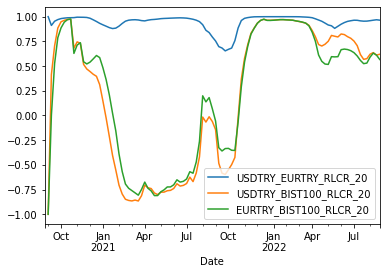

In [24]:
# buradaki amacimiz detayli bir analiz yapmak olmadigindan, kayan korelasyonlari görsel olarak
# degerlendirip bir ön fikir sahibi olmaya calisacagiz.
# pandas'in bu metodunun 'matplotlib' paketine ihtiyac duydugunu unutmayin.
roll_corrs.plot();

Yukarıdaki grafikte gördüğümüze göre (USDTRY, BIST100) ve (EURTRY, BIST100) arasında stabil bir ilişki
olmnadığı fikrini ortaya atabiliriz çünkü ilişkinin zaman içinde hem yönü hem de şiddeti aşırı derecede
salınım yapıyor. Buna karşın; (USDTRY, EURTRY) arasında ise uzun dönemli pozitif yönlü tutarlı bir ilişki olduğu
sonucuna varabiliriz.

#### 4.12. [__Z-Skoru: Z<sub>t</sub> = (y<sub>t</sub> - ȳ) / σ<sub>y</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-z-score)

_Z-Skoru_ standart sapma birimleriyle ölçüldüğünde, herhangi bir değerin ortalamaya uzaklığının bir
skalar ölçüsünü verir. Z-Skoru; normal dağılan seriler (y:~N(μ, σ)) için beklenen değerlerden sapmanın
tespit edilmesinde kullanılır. Bununla birlikte, büyük örneklem varsayımı altında herhangi bir seride
`+3` değerinden büyük ve `-3` değerinden küçük z-skoru varlığı, bu değerin bir dışa düşen olabileceğinin
göstergesidir. Seriler için z-skor değerlerini `z-score()` metodu ile alabilirsiniz.

In [54]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [56]:
usdtry = connector.get_series("usdtry", period="3m", frequency='B')

# bu verilen her seri ve bu serilerin her bir degeri icin z-skoru'nu verir.
usdtry_z = transformator.z_score(usdtry, precision=2)

In [57]:
usdtry_z.head()

,USDTRY,USDTRY_Z
Date,,
2022-05-27,16.368099,-1.80
2022-05-30,16.347900,-1.84
2022-05-31,16.356199,-1.82
2022-06-01,16.387600,-1.77
2022-06-02,16.412701,-1.72


`z-score()`; çoğul seriler için de kullanılabilir.

In [73]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [29]:
rates = connector.get_series("usdtry, eurtry", period="3m", frequency="B")

# bu, USDTRY ve EURTRY serilerinin z-skorlarini verir.
rates_z = transformator.z_score(rates, precision=2)

In [30]:
rates_z.head()

,USDTRY,EURTRY,USDTRY_Z,EURTRY_Z
Date,,,,
2022-05-26,16.267000,17.365999,-1.91,-1.84
2022-05-27,16.368000,17.510000,-1.73,-1.40
2022-05-30,16.348000,17.527000,-1.77,-1.35
2022-05-31,16.356001,17.601999,-1.75,-1.12
2022-06-01,16.388000,17.570000,-1.70,-1.22


#### 4.13. [__Medyan Mutlak Sapma: medyan(|y<sub>t</sub> - medyan(y<sub>t</sub>)|)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-mad)

_Medyan Mutlak Sapma_ (__MAD__); mutlak değerler ile ölçüldüğünde değerlerin medyan değerden sapmalarının medyanıdır.
Medyan mutlak sapma, normal dağılmayan seriler için standar sapma yerine kullanılabilecek bir değişkenlik
ölçüsü olarak düşünülebilir. MAD; normal dağılmayan seriler için bile kararlı (robust) bir parametre istatistiğidir.
Büyük örneklem varsayımı altında `+3`'den büyük ve `-3`'den küçük MAD değeri; incelenen seri normal dağılmasa dahi
bu değerin bir dışa düşen olduğunu ifade eder. Medyan Mutlak Sapma'yı `mad()` metoduyla alabilirsiniz.

In [58]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [59]:
# bu verilen her seri ve bu serilerin her bir degeri icin medyan mutlak sapmaları verir.
usdtry_mad = transformator.mad(usdtry, precision=2)

In [60]:
usdtry_mad.head()

,USDTRY,USDTRY_MAD
Date,,
2022-06-01,16.387600,-2.65
2022-06-02,16.412701,-2.56
2022-06-03,16.438999,-2.47
2022-06-06,16.476500,-2.34
2022-06-07,16.558800,-2.05


`mad()`; çoğul seriler için de kullanılabilir.

In [74]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [33]:
# bu, USDTRY ve EURTRY serileri icin medyandan mutlak sapmalari verir
rates_mad = transformator.mad(rates, precision=2)

In [34]:
rates_mad.head()

,USDTRY,EURTRY,USDTRY_MAD,EURTRY_MAD
Date,,,,
2022-05-26,16.267000,17.365999,-1.25,-1.97
2022-05-27,16.368000,17.510000,-1.13,-1.56
2022-05-30,16.348000,17.527000,-1.15,-1.51
2022-05-31,16.356001,17.601999,-1.15,-1.30
2022-06-01,16.388000,17.570000,-1.11,-1.39


#### 4.14. [__Normalize Seriler: y<sub>t, normal</sub> = F(y<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-normalized)

Makine öğrenmesi gibi diğer uygulamalarda girdi olarak kullanmak için serileri nomralize edebilirsiniz.
Normalize edilmiş serileri almak için `nomralize()` metodunu kullanabilirsiniz.

Normalizasyon için `6` adet normalizasyon fonksiyonu belirlenmiştir ve bunlar;

|Metot        | Tanım                                              | Aralık         |
|:-------------|:------------------------------------------------------- |:--------------|
|`simple`      |  x / (max(x) + 1)                                       | [0, +1)       |
| `min - max`  | (x - min(x)) / (max(x) - min(x))                        | (0, 1]        |
| `mean`       | (x - x̄) / (max(x) + 1)                                  | [-1, +1)      |
| `median`     | (x - median(x)) / (max(x) + 1)                          | [-1, +1)      |
| `mad`        | (x - median(x)) / (median(\|(x - median(x)\|)) * 1.4826 | (-inf, +inf)  |
| `z`          | (x- x̄) / σ<sub>x</sub>                                  | (-inf, +inf)  |

> 1.4826 ölçeklendirme faktörüdür ve `1 / QNormal(%75)`' eşittir.

In [61]:
usdtry = connector.get_series("usdtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [62]:
# bu, verilen normalizasyon fonksiyonuna göre (burada: z) USDTRY'nin normalize degerlerini verir.
usdtry_normalized = transformator.normalize(usdtry, method="z")

In [63]:
usdtry_normalized.head(3)

,USDTRY,USDTRY_NORM
Date,,
2022-06-01,16.387600,-1.5942
2022-06-02,16.412701,-1.5248
2022-06-03,16.438999,-1.4522


In [64]:
# bu, verilen normalizasyon fonksiyonuna göre (burada: simple) USDTRY'nin normalize degerlerini verir.
usdtry_normalized = transformator.normalize(usdtry, method="simple")

In [65]:
usdtry_normalized.head(3)

,USDTRY,USDTRY_NORM
Date,,
2022-06-01,16.387600,0.8932
2022-06-02,16.412701,0.8945
2022-06-03,16.438999,0.8960


`normalize()`; çoğul seriler için de kullanılabilir.

In [75]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.06.2022",
                              end_date="30.06.2022",
                              frequency="B")

In [66]:
# bu, hem USDTRY hem de EURTRY'nin normalize edilmis degerlerini verir.
rates_normalized = transformator.normalize(rates, method='mad', keep_originals=False)

In [41]:
rates_normalized.head()

,USDTRY_NORM,EURTRY_NORM
Date,,
2022-05-26,-1.247924,-1.970829
2022-05-27,-1.131274,-1.561008
2022-05-30,-1.154374,-1.512626
2022-05-31,-1.145132,-1.299183
2022-06-01,-1.108174,-1.390252


#### 4.15. [__Dummy Series: D<sub>n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-dummies)

Verilen eşik değerlerine uygun şartlara göre kukla seriler oluşturmak için `dummy()` metodunu kullanabilirsiniz. Kukla değişkenler yapısal değişim ya da kırılmaları ve bazı uygulamalarda dışa düşenleri modellemek için idealdir.

Kullanılabilecek şartlar;

|şart  |açıklama|
|:------:|--------|
| `>`  | verilen eşik değerden büyük|
| `>=` | verilen eşik değere eşit ya da büyük|
| `<`  | verilen eşik değerden küçük|
| `<=` | verilen eşik değere eşit ya da küçük|
| `()` | alt eşik değerden büyük ve üst eşik değerden küçük (kapalı aralık)|
| `[]` | alt eşik değere eşit ya da büyük ve üst eşik değere eşit ya da küçük (açık aralık)|

In [46]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [49]:
# bu, USDTRY'nin 8'den büyük degerleri icin 1, geri kalan degerler icin 0 degeri alan bir kukla degiskenb verir.
usdtry_gt8 = transformator.dummy(usdtry, ">", 8)

In [50]:
usdtry_gt8

,USDTRY,USDTRY_GTT_8
Date,,
2020-03-31,6.094,0.0
2020-06-30,6.853,0.0
2020-09-30,7.208,0.0
2020-12-31,7.862,0.0
2021-03-31,7.377,0.0
2021-06-30,8.370,1.0
2021-09-30,8.528,1.0
2021-12-31,11.161,1.0


In [51]:
# bu, USDTRY'nin 8'den büyük degerleri icin 1, geri kalan degerler icin -1 degeri alan bir kukla degiskenb verir.
usdtry_gt8 = transformator.dummy(usdtry, ">", 8, fill_true=1, fill_false=-1)

In [52]:
usdtry_gt8

,USDTRY,USDTRY_GTT_8
Date,,
2020-03-31,6.094,-1.0
2020-06-30,6.853,-1.0
2020-09-30,7.208,-1.0
2020-12-31,7.862,-1.0
2021-03-31,7.377,-1.0
2021-06-30,8.370,1.0
2021-09-30,8.528,1.0
2021-12-31,11.161,1.0


In [53]:
# bu, USDTRY'nin 8'e esit ya da kucuk degerleri icin 2, diger degerler icin 1 degeri alan bir kukla degisken verir
usdtry_st8 = transformator.dummy(usdtry, "<=", 8, fill_true=2, fill_false=1)

In [54]:
usdtry_st8

,USDTRY,USDTRY_SOET_8
Date,,
2020-03-31,6.094,2.0
2020-06-30,6.853,2.0
2020-09-30,7.208,2.0
2020-12-31,7.862,2.0
2021-03-31,7.377,2.0
2021-06-30,8.370,1.0
2021-09-30,8.528,1.0
2021-12-31,11.161,1.0


In [58]:
# bu, USDTRY'nin 7.21'den buyuk ve 8.37'den kucuk degerleri icin 1, geri kalan deger icin 0 degeri alan
# bir kukla degisken verir (kapali aralik)
usdtry_d1 = transformator.dummy(usdtry, "()", "7.21, 8.37")

In [59]:
usdtry_d1

,USDTRY,USDTRY_CBOUND
Date,,
2020-03-31,6.094,0.0
2020-06-30,6.853,0.0
2020-09-30,7.208,0.0
2020-12-31,7.862,1.0
2021-03-31,7.377,1.0
2021-06-30,8.370,0.0
2021-09-30,8.528,0.0
2021-12-31,11.161,0.0


In [60]:
# bu, USDTRY'nin 7.21'e esit ya da buyuk ve 8.37'ye esit ya kucuk degerleri icin 1,
# geri kalan deger icin 0 degeri alan bir kukla degisken verir (acik aralik)
usdtry_d1 = transformator.dummy(usdtry, "[]", "7.21, 8.37", keep_originals=False)

In [61]:
# sinirlar Tuple ya da List nesneleri icinde de verilebilir
open_bounds = [7.21, 8.37]
usdtry_d1 = transformator.dummy(usdtry, "[]", open_bounds)

In [62]:
usdtry_d1

,USDTRY,USDTRY_OBOUND
Date,,
2020-03-31,6.094,0.0
2020-06-30,6.853,0.0
2020-09-30,7.208,0.0
2020-12-31,7.862,1.0
2021-03-31,7.377,1.0
2021-06-30,8.370,1.0
2021-09-30,8.528,0.0
2021-12-31,11.161,0.0


`dummy()`; çoğul seriler için de kullanılabilir.

In [63]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [68]:
# bu, USDTRY ve EURTRY'nin 7.21'e esit ya da buyuk ve 8.37'ye esit ya kucuk degerleri icin 1,
# geri kalan deger icin 0 degeri alan bir kukla degisken verir (acik aralik)
rates_d1 = transformator.dummy(rates, "[]", "7.21, 8.37", keep_originals=False)

In [69]:
rates_d1

,USDTRY_OBOUND,EURTRY_OBOUND
Date,,
2020-03-31,0.0,0.0
2020-06-30,0.0,1.0
2020-09-30,0.0,0.0
2020-12-31,1.0,0.0
2021-03-31,1.0,0.0
2021-06-30,1.0,0.0
2021-09-30,0.0,0.0
2021-12-31,0.0,0.0


#### 4.16. [__Gecikmeli Seriler: y<sub>t-1</sub>, y<sub>t-2</sub> ... y<sub>t-n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-laggeds)

Gecikmeli seriler almak icin `laggeds()` metodunu kullanabilirsiniz. Gecikmeli seriler bazi ozel modeller
icin gerekli olurken genel olarak da otokorelasyon probleminin giderilmesinde kullanilabilir.

In [3]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [4]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [7]:
# bu, sadece usdtry(t-2)'yi verir
usdtry_l2 = transformator.laggeds(usdtry, lags=2)

In [8]:
usdtry_l2

,USDTRY,USDTRY_LAG_2
Date,,
2020-03-31,6.093850,NaN
2020-06-30,6.852923,NaN
2020-09-30,7.207746,6.093850
2020-12-31,7.861628,6.852923
2021-03-31,7.377400,7.207746
2021-06-30,8.369557,7.861628
2021-09-30,8.527857,7.377400
2021-12-31,11.161016,8.369557


In [9]:
# bu, usdtry(t-1), usdtry(t-3) ve usdtry(t-5)'i verir
usdtry_135 = transformator.laggeds(usdtry, lags="1, 3, 5")

In [10]:
usdtry_135

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_3,USDTRY_LAG_5
Date,,,,
2020-03-31,6.093850,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN
2020-09-30,7.207746,6.852923,NaN,NaN
2020-12-31,7.861628,7.207746,6.093850,NaN
2021-03-31,7.377400,7.861628,6.852923,NaN
2021-06-30,8.369557,7.377400,7.207746,6.093850
2021-09-30,8.527857,8.369557,7.861628,6.852923
2021-12-31,11.161016,8.527857,7.377400,7.207746


In [11]:
lags = [1, 3, 5]

# bu da usdtry(t-1), usdtry(t-3) ve usdtry(t-5)'i verir
usdtry_135 = transformator.laggeds(usdtry, lags=lags)

In [12]:
usdtry_135

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_3,USDTRY_LAG_5
Date,,,,
2020-03-31,6.093850,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN
2020-09-30,7.207746,6.852923,NaN,NaN
2020-12-31,7.861628,7.207746,6.093850,NaN
2021-03-31,7.377400,7.861628,6.852923,NaN
2021-06-30,8.369557,7.377400,7.207746,6.093850
2021-09-30,8.527857,8.369557,7.861628,6.852923
2021-12-31,11.161016,8.527857,7.377400,7.207746


In [13]:
# bu, usdtry(t-1), usdtry(t-2), usdtry(t-3)'u verir
usdtry_3 = transformator.laggeds(usdtry, range_lags=3)

In [14]:
usdtry_3

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_3
Date,,,,
2020-03-31,6.093850,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN
2020-09-30,7.207746,6.852923,6.093850,NaN
2020-12-31,7.861628,7.207746,6.852923,6.093850
2021-03-31,7.377400,7.861628,7.207746,6.852923
2021-06-30,8.369557,7.377400,7.861628,7.207746
2021-09-30,8.527857,8.369557,7.377400,7.861628
2021-12-31,11.161016,8.527857,8.369557,7.377400


In [15]:
# bu, usdtry(t-1), usdtry(t-2), usdtry(t-4), usdtry(t-6)'yi verir
usdtry_12612 = transformator.laggeds(usdtry, range_lags=2, lags="4, 6")

In [16]:
usdtry_12612

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_4,USDTRY_LAG_6
Date,,,,,
2020-03-31,6.093850,NaN,NaN,NaN,NaN
2020-06-30,6.852923,6.093850,NaN,NaN,NaN
2020-09-30,7.207746,6.852923,6.093850,NaN,NaN
2020-12-31,7.861628,7.207746,6.852923,NaN,NaN
2021-03-31,7.377400,7.861628,7.207746,6.093850,NaN
2021-06-30,8.369557,7.377400,7.861628,6.852923,NaN
2021-09-30,8.527857,8.369557,7.377400,7.207746,6.093850
2021-12-31,11.161016,8.527857,8.369557,7.861628,6.852923


`laggeds()`; çoğul seriler için de kullanılabilir.

In [17]:
# bu; usdtry(t-1), eurtry(t-1), usdtry(t-2), eurtry(t-2),
# usdtry(t-4), eurtry(t-4), usdtry(t-6), eurtry(t-6)'yi verir
rates_lag = transformator.laggeds(rates, range_lags=2, lags="4, 6", precision=2, keep_originals=False)

In [18]:
rates_lag

,USDTRY_LAG_1,EURTRY_LAG_1,USDTRY_LAG_2,EURTRY_LAG_2,USDTRY_LAG_4,EURTRY_LAG_4,USDTRY_LAG_6,EURTRY_LAG_6
Date,,,,,,,,
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-30,6.09,6.72,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,6.85,7.55,6.09,6.72,NaN,NaN,NaN,NaN
2020-12-31,7.21,8.42,6.85,7.55,NaN,NaN,NaN,NaN
2021-03-31,7.86,9.37,7.21,8.42,6.09,6.72,NaN,NaN
2021-06-30,7.38,8.90,7.86,9.37,6.85,7.55,NaN,NaN
2021-09-30,8.37,10.08,7.38,8.90,7.21,8.42,6.09,6.72
2021-12-31,8.53,10.06,8.37,10.08,7.86,9.37,6.85,7.55


#### 4.17. [__Korelasyon Katsayıları: ρ(y<sub>t</sub>, x<sub>t</sub>)__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-corr)

Verilen seriler arasındaki korelasyon katsayılarını görmek için `corr()` metodunu kullanabilirisniz.
Korelasyon katsayılarının gözlemlenmesi özellikle düşünülen modelin bağımsız değişkenleri arasında
oluşabilecek çoklu doğrusal bağıntı probleminin varlığı ile ilgili ön bilgi verir. Genel olarak; model
için düşünülen bağımsız değişkenler arasında gözlemlenen yüksek korelasyon (genel oalrak: `ρ > 0.6` ya da `ρ < -0.6`),
modelde çoklu doğrusal bağıntı probleminin olabileceğini gösterir. `corr()` metodu ile
`Pearson Doğrusal`, `Kendall Tau` ve `Spearman Sıra Korelasyon` katsayılarını alabilirsiniz.

> Kendall Tau korelasyon katsayılarnın hesaplanması için `scipy` paketi gereklidir.

In [19]:
# referans isimleri kullanrak serileri indirelim
series = connector.get_series("usdtry, eurtry, bist100",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="M")

In [20]:
# bu, usdtry, eurtry ve bist100 serileri arasindaki Pearson Dogrusal Korelasyon Katsayilari'ni verir
corrs = transformator.corr(series, precision=4)

In [21]:
corrs

,USDTRY,EURTRY,BIST100
USDTRY,1.0000,0.9978,0.8475
EURTRY,0.9978,1.0000,0.8287
BIST100,0.8475,0.8287,1.0000


In [22]:
# bu, usdtry, eurtry ve bist100 serileri arasindaki Spearman Sıra Korelasyon Katsayilari'ni verir
corrs_sp = transformator.corr(series, method='spearman')

In [24]:
corrs_sp

,USDTRY,EURTRY,BIST100
USDTRY,1.000000,0.972028,0.370629
EURTRY,0.972028,1.000000,0.349650
BIST100,0.370629,0.349650,1.000000


#### 4.18. [__Otokorelasyon Katsayıları: AUTOCORR<sub>t</sub> = ρ<sub>t, t-n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-auto-corr)

Orijinal seriler ve bunların gecikmeli serileri arasındaki corelasyonları (otokorelasyonları) almak için
`autocorr()` metodunu kullanabilirsiniz. Otokorelasyon katsayıları size serilerin durağanlığı ile ilgili
basit bir önbilgi sağlayabilir. Seri ve serinin gecikmeli değerleri arasında gözlemlenen yüksek korelasyon
(genel oalrak: `ρ > 0.6` ya da `ρ < -0.6`), seri değerlerinin zaman içindeki geçmiş değerlerine aşırı
bağlı olduğunu ve dolayısıyla ortalamasının zamanla değişebileceğini (stokastik trend varlığını) gösterebilir.

In [35]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="W")

In [36]:
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="Q")

In [37]:
usdtry.head(3)

,USDTRY
Date,
2020-01-03,5.94125
2020-01-10,5.94520
2020-01-17,5.87128


In [38]:
rates.head(3)

,USDTRY,EURTRY
Date,,
2020-03-31,6.093850,6.723150
2020-06-30,6.852923,7.547287
2020-09-30,7.207746,8.423696


In [27]:
# bu; usdtry ile usdtry(t-1), usdtry(t-2) ve usdtry(t-3) arasindaki korelasyonlari verir
autocorrs = transformator.autocorr(usdtry, range_lags=3)

In [28]:
autocorrs

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_3
USDTRY,1.000000,0.978949,0.949550,0.923296
USDTRY_LAG_1,0.978949,1.000000,0.989265,0.968197
USDTRY_LAG_2,0.949550,0.989265,1.000000,0.989223
USDTRY_LAG_3,0.923296,0.968197,0.989223,1.000000


In [29]:
# bu; usdtry ile usdtry(t-1), usdtry(t-3) ve usdtry(t-5) arasindaki korelasyonlari verir
autocorrs = transformator.autocorr(usdtry, lags="1, 3, 5")

In [30]:
autocorrs

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_3,USDTRY_LAG_5
USDTRY,1.000000,0.978949,0.923296,0.863355
USDTRY_LAG_1,0.978949,1.000000,0.968197,0.901092
USDTRY_LAG_3,0.923296,0.968197,1.000000,0.954251
USDTRY_LAG_5,0.863355,0.901092,0.954251,1.000000


In [31]:
# bu; usdtry ile usdtry(t-1), usdtry(t-2), usdtry(t-3), usdtry(t-4) ve usdtry(t-12)
# arasindaki korelasyonlari verir
autocorrs = transformator.autocorr(usdtry, range_lags=4, lags=12)

In [32]:
autocorrs

,USDTRY,USDTRY_LAG_1,USDTRY_LAG_2,USDTRY_LAG_3,USDTRY_LAG_4,USDTRY_LAG_12
USDTRY,1.000000,0.978949,0.949550,0.923296,0.892856,0.644941
USDTRY_LAG_1,0.978949,1.000000,0.989265,0.968197,0.938588,0.657745
USDTRY_LAG_2,0.949550,0.989265,1.000000,0.989223,0.963580,0.683205
USDTRY_LAG_3,0.923296,0.968197,0.989223,1.000000,0.986399,0.724432
USDTRY_LAG_4,0.892856,0.938588,0.963580,0.986399,1.000000,0.774338
USDTRY_LAG_12,0.644941,0.657745,0.683205,0.724432,0.774338,1.000000


`autocorr()`; çoğul seriler için de kullanılabilir.

In [14]:
# verilen dataframe icindeki herhangi bir seriye ait atokorelasyonlari almak icin 'column' parametresini
# kullanabilirsiniz. 'column', seri adi ya da seri sutun indeksi (0'dan baslayarak) olarak verilebilir

# bu EURTRY sutununu secer ve secili gecikmeler icin otokorelasyonlari verir
eurtry_autocorr = transformator.autocorr(rates, column='eurtry', range_lags=4, precision=4)

In [34]:
eurtry_autocorr

,EURTRY,EURTRY_LAG_1,EURTRY_LAG_2,EURTRY_LAG_3,EURTRY_LAG_4
EURTRY,1.0000,0.7977,0.8495,0.5765,0.9214
EURTRY_LAG_1,0.7977,1.0000,0.8470,0.8450,0.7341
EURTRY_LAG_2,0.8495,0.8470,1.0000,0.7933,0.8242
EURTRY_LAG_3,0.5765,0.8450,0.7933,1.0000,0.8115
EURTRY_LAG_4,0.9214,0.7341,0.8242,0.8115,1.0000


In [35]:
# EURTRY'nin dataframe icindeki sutun indeks numarasi 1 oldugu icin bu da ayni isi yapar.
eurtry_autocorr = transformator.autocorr(rates, column=1, range_lags=4, precision=4)

In [36]:
eurtry_autocorr

,EURTRY,EURTRY_LAG_1,EURTRY_LAG_2,EURTRY_LAG_3,EURTRY_LAG_4
EURTRY,1.0000,0.7977,0.8495,0.5765,0.9214
EURTRY_LAG_1,0.7977,1.0000,0.8470,0.8450,0.7341
EURTRY_LAG_2,0.8495,0.8470,1.0000,0.7933,0.8242
EURTRY_LAG_3,0.5765,0.8450,0.7933,1.0000,0.8115
EURTRY_LAG_4,0.9214,0.7341,0.8242,0.8115,1.0000


#### 4.19. [__Serial Correlation Coefficients: SERIALCORR<sub>t</sub> = ρ<sub>t, x-n</sub>__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-serial-corr)

`serial_corr()` metodu ile verilen bir `DataFrame` içinde bir seriyi sabitleyerek, bu seri ile kalan seriler
ve bunlarin gecikmeleriyle olan korelasyonlari gosteren bir vektor alabilirsiniz. Bu, sabitlediginiz seri
ile diğer seriler ve bunların gecikmeli değerleri arasındaki ilişkiler hakkında kolayca bir ön fikir
sahibi olmanızı sağlar.

In [5]:
# referans isimleri kullanrak seriler indirelim
series = connector.get_series("usdtry, eurtry, bist100",
                              start_date="01.01.2021",
                              end_date="31.12.2021",
                              frequency="B")

In [10]:
series.head(3)

,USDTRY,EURTRY,BIST100
Date,,,
2021-01-01,NaN,NaN,NaN
2021-01-04,7.4194,9.1164,1495.430054
2021-01-05,7.3602,9.0382,1489.560059


In [6]:
# bu, BIST100 serisini sabitleyerek bu seri ile kalan seriler ve onlarin verilen gecikmeleri arasindaki
# korelasyonlari verecektir.
sc_vector = transformator.serial_corr(series, hold="bist100", range_lags=4, lags=12)

In [7]:
sc_vector

,BIST100
BIST100,1.000000
USDTRY,0.802526
EURTRY,0.795602
USDTRY_LAG_1,0.790575
EURTRY_LAG_1,0.781897
USDTRY_LAG_2,0.783268
EURTRY_LAG_2,0.773447
USDTRY_LAG_3,0.781320
EURTRY_LAG_3,0.770897
USDTRY_LAG_4,0.781647


In [15]:
# usdtry'nin DataFrame icindeki sutun sirasi 0 oldugu icin bu; usdtry'yi sabit tutup,
# frame icindeki diger seriler ile gecikmeler de dahil olarak korelasyonlari verir
sc_vector = transformator.serial_corr(series, hold=0, range_lags=4, lags=12, precision=4)

In [16]:
sc_vector

,USDTRY
USDTRY,1.0000
EURTRY,0.9975
BIST100,0.8025
EURTRY_LAG_1,0.9772
BIST100_LAG_1,0.8121
EURTRY_LAG_2,0.9550
BIST100_LAG_2,0.8133
EURTRY_LAG_3,0.9325
BIST100_LAG_3,0.8096
EURTRY_LAG_4,0.9172


#### 4.20. [__Dışa Düşenler__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-outliers)

Verilen seriler içindeki dışa düşen değerleri bir kukla değişken yardımıyla tespit etmek için `outliers()`
metodunu kullanabilirsiniz.

Geri dönen kukla değişken serisi `0` ve `1`'lerden oluşak ve aşağıdakileri ifade edecektir:
- `1`: Karşılık gelen tarihteki değer bir dışa düşendir.
- `0`: Karşılık gelen tarihteki değer bir dışa düşen değildir.

In [17]:
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="W")

In [18]:
series = connector.get_series("usdtry, eurtry, bist100",
                              start_date="01.01.2020",
                              end_date="01.01.2022",
                              frequency="W")

In [19]:
# bu, medyan mutlak sapma kriterine göre ve -3, +3 değerleri sınır kabul edilerek (var ise) dışa düşenleri verir.
usdtry_outliers_d = transformator.outliers(usdtry)

In [20]:
usdtry_outliers_d

,USDTRY,USDTRY_OUT
Date,,
2020-01-03,5.94125,0.0
2020-01-10,5.94520,0.0
2020-01-17,5.87128,0.0
2020-01-24,5.90358,0.0
2020-01-31,5.94228,0.0
...,...,...
2021-12-03,12.88396,1.0
2021-12-10,13.69762,1.0
2021-12-17,14.42048,1.0


In [21]:
# bu, medyan mutlak sapma kriterine göre ve -5, +5 değerleri sınır kabul edilerek (var ise) dışa düşenleri verir.
usdtry_outliers_d = transformator.outliers(usdtry, critical_upper=5, critical_lower=-5)

In [22]:
usdtry_outliers_d

,USDTRY,USDTRY_OUT
Date,,
2020-01-03,5.94125,0.0
2020-01-10,5.94520,0.0
2020-01-17,5.87128,0.0
2020-01-24,5.90358,0.0
2020-01-31,5.94228,0.0
...,...,...
2021-12-03,12.88396,0.0
2021-12-10,13.69762,1.0
2021-12-17,14.42048,1.0


In [23]:
# bu, z-skoru kriterine göre ve -4, +4 değerleri sınır kabul edilerek (var ise) dışa düşenleri verir.
usdtry_outliers_d = transformator.outliers(usdtry, method="z", critical_lower=-4, critical_upper=4)

In [24]:
usdtry_outliers_d

,USDTRY,USDTRY_OUT
Date,,
2020-01-03,5.94125,0.0
2020-01-10,5.94520,0.0
2020-01-17,5.87128,0.0
2020-01-24,5.90358,0.0
2020-01-31,5.94228,0.0
...,...,...
2021-12-03,12.88396,0.0
2021-12-10,13.69762,0.0
2021-12-17,14.42048,1.0


`outliers()`; çoğul seriler için de kullanılabilir.

In [25]:
# bu, z-skoru kriterine göre DataFrame icinde verilen tum seriler (usdtry, eurtry ve bist100) icin
# -2.56, +2.56 degerleri sinir kabul edilerek disa dusenleri verir.
all_outliers = transformator.outliers(
    series, method="z", critical_lower=-2.56, critical_upper=2.56, keep_originals=False
)

In [26]:
all_outliers

,USDTRY_OUT,EURTRY_OUT,BIST100_OUT
Date,,,
2020-01-03,0.0,0.0,0.0
2020-01-10,0.0,0.0,0.0
2020-01-17,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0
...,...,...,...
2021-12-03,1.0,1.0,0.0
2021-12-10,1.0,1.0,1.0
2021-12-17,1.0,1.0,1.0


#### 4.21. [__Yumuşatılmış Seriler__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#get-smoothed)

Serilerden, verilen şart ve metotlara göre yumuşatılmış seriler almak için `smooth()` metodunu kullanabilirsiniz.
Serilerin gelecek değerlerinin tahmini amacıyla değil de değişkenler arasındaki genel ilişkinin ortaya çıkarılması
için yapılan modellemelerde yumuşatılmış seriler kullanmak iyi bir yoldur. Yumuşatılmış seriler; seriler içindeki
aşırı varyansı dışlayarak, dışa düşünlerin genel ilişkileri çarpıtmasına engel olur.

`smooth()` metodu aşağıdkai gibi seriler üretir:
- Yumuşatılmış Değer: Tespit edilen dışa düşen(ler)in yerine.
- Orijinal Gözlem: Dışa düşen olarak değerlendirilmeyen değerler.
- Yumuşatılmış değerler; verilen yumuşatma metodu (ema ya da sma) ve sınırlara göre yapılır.

In [5]:
# serileri referans isimleri kullanarak indirelim
usdtry = connector.get_series("usdtry",
                              start_date="01.01.2014",
                              end_date="31.12.2021",
                              frequency="M")

In [6]:
# serileri referans isimleri kullanarak indirelim
rates = connector.get_series("usdtry, eurtry",
                              start_date="01.01.2014",
                              end_date="31.12.2021",
                              frequency="M")

In [7]:
# bu, usdtry serisi icinde (eger varsa) medyan mutlak sapma kriterine gore (-3, +3) disinda kalan degerleri
# (disa dusenleri) 3 donemlik basit hareketli ortalama kullanarak yumusatir ve yeni bir seri olarak verir.
smoothed_mad = transformator.smooth(usdtry, smooth_method='sma', smooth_window=3)

In [9]:
smoothed_mad.tail(10)

,USDTRY,USDTRY_SMOOTH
Date,,
2021-03-31,7.628235,7.628235
2021-04-30,8.155024,8.155024
2021-05-31,8.342250,8.342250
2021-06-30,8.596682,8.596682
2021-07-31,8.612941,8.612941
2021-08-31,8.475715,8.475715
2021-09-30,8.511882,8.511882
2021-10-31,9.139945,9.139945
2021-11-30,10.523264,10.523264


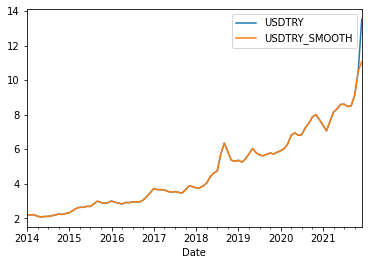

In [10]:
# asagidaki grafigi gorebilmek icin 'matplotlib' paketine ihtiyaciniz oldugunu unutmayin
smoothed_mad.plot();

In [11]:
# bu, usdtry serisi icinde (eger varsa) medyan mutlak sapma kriterine gore (-3, +3) disinda kalan degerleri
# (disa dusenleri) 2 donemlik üssel hareketli ortalama kullanarak yumusatir ve yeni bir seri olarak verir.
smoothed_mad = transformator.smooth(usdtry, smooth_method='ema', smooth_window=2)

In [12]:
smoothed_mad.tail(10)

,USDTRY,USDTRY_SMOOTH
Date,,
2021-03-31,7.628235,7.628235
2021-04-30,8.155024,8.155024
2021-05-31,8.342250,8.342250
2021-06-30,8.596682,8.596682
2021-07-31,8.612941,8.612941
2021-08-31,8.475715,8.475715
2021-09-30,8.511882,8.511882
2021-10-31,9.139945,9.139945
2021-11-30,10.523264,10.523264


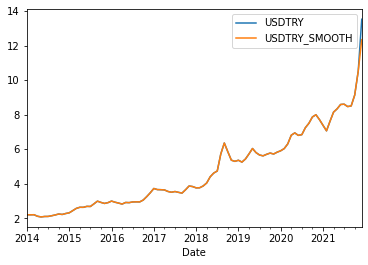

In [13]:
# asagidaki grafigi gorebilmek icin 'matplotlib' paketine ihtiyaciniz oldugunu unutmayin
smoothed_mad.plot();

`smooth()`; çoğul seriler için de kullanılabilir.

In [14]:
# bu, kur serilerini z-skoru degerleri ve (-2.56, +2.56) sınırlarına göre değerlendirerek dışa düşenleri
# tespit eder ve (eğer varsa) bu değerler yerine serilerin 3 dönemlik üssel hareketli ortalamalarını
# bu değerler yerine kullanarak yumuşatılmış kur serileri üretir.
smoothed_rates = transformator.smooth(
    series=rates,
    method='z',
    critical_lower=-2.56,
    critical_upper=2.56,
    smooth_method='ema',
    smooth_window=3,
    keep_originals=False,
    precision=2
)

In [15]:
smoothed_rates.tail(10)

,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,
2021-03-31,7.63,9.09
2021-04-30,8.16,9.73
2021-05-31,8.34,10.13
2021-06-30,8.60,10.37
2021-07-31,8.61,10.19
2021-08-31,8.48,9.98
2021-09-30,8.51,10.03
2021-10-31,9.14,10.60
2021-11-30,10.52,12.01


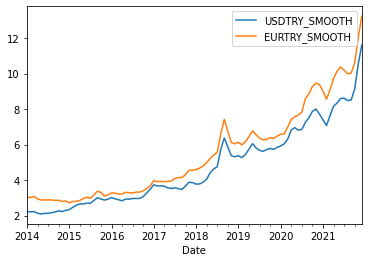

In [16]:
# asagidaki grafigi gorebilmek icin 'matplotlib' paketine ihtiyaciniz oldugunu unutmayin
smoothed_rates.plot();

### 5. [__Connector ve Transformator Metotlarını Birleştirme__](https://github.com/syncoding/evdsts/blob/master/docs/manuals/manual_en.md#joining-methods)

Eğer isterseniz `Connector` ve `Transformator` metotlarını birleştirerek zincir metotlar oluşturabilirsiniz.

In [17]:
connector = Connector()          # API anahtarınızı diske kaydetmis oldugunuzu varsayiyioruz.
transformator = Transformator()

Asagidaki ornekler asagidaki referans isimleri diske kaydetmis oldugunuzu varsayiyor:
- usdtry -> 'TP.DK.USD.A.YTL'
- eurtry -> 'TP.DK.EUR.A.YTL'

In [18]:
# bu, yumusatilmis usdtry ve eurtry serilerini verir
smoothed_rates = (
    transformator
    .smooth(
            connector
            .get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M")
    )
)

In [19]:
smoothed_rates.tail(10)

,USDTRY,EURTRY,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,,,
2021-03-31,7.628235,9.091334,7.628235,9.091334
2021-04-30,8.155024,9.733895,8.155024,9.733895
2021-05-31,8.342250,10.130661,8.342250,10.130661
2021-06-30,8.596682,10.371214,8.596682,10.371214
2021-07-31,8.612941,10.192188,8.612941,10.192188
2021-08-31,8.475715,9.978305,8.475715,9.978305
2021-09-30,8.511882,10.028577,8.511882,10.028577
2021-10-31,9.139945,10.601325,9.139945,10.601325
2021-11-30,10.523264,12.011395,10.523264,11.478622


In [20]:
# bu da yumusatilmis usdtry ve eurtry serilerini verir
smoothed_rates = transformator.smooth(
    connector.get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M")
)

In [21]:
smoothed_rates.tail(10)

,USDTRY,EURTRY,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,,,
2021-03-31,7.628235,9.091334,7.628235,9.091334
2021-04-30,8.155024,9.733895,8.155024,9.733895
2021-05-31,8.342250,10.130661,8.342250,10.130661
2021-06-30,8.596682,10.371214,8.596682,10.371214
2021-07-31,8.612941,10.192188,8.612941,10.192188
2021-08-31,8.475715,9.978305,8.475715,9.978305
2021-09-30,8.511882,10.028577,8.511882,10.028577
2021-10-31,9.139945,10.601325,9.139945,10.601325
2021-11-30,10.523264,12.011395,10.523264,11.478622


In [23]:
# bu, z-skoru ve (-1.96, +1.96) sınır degerlerine göre yumusatilmis usdtry ve eurtry serilerini verir,
# burada 'keep_originals' parametresi 'False' olarak ayarlandigi icin geri donen seriler icinde
# orijinal serilerin olmayacagina dikkat edin.
smoothed_rates = (
    transformator
    .smooth(
        series=connector.get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M"),
        method="z", critical_lower=-1.96, critical_upper=1.96, keep_originals=False
    )
)

In [24]:
smoothed_rates.tail(10)

,USDTRY_SMOOTH,EURTRY_SMOOTH
Date,,
2021-03-31,7.628235,9.091334
2021-04-30,8.155024,9.733895
2021-05-31,8.342250,10.130661
2021-06-30,8.596682,10.371214
2021-07-31,8.612941,10.192188
2021-08-31,8.475715,9.978305
2021-09-30,8.511882,10.028577
2021-10-31,9.139945,10.601325
2021-11-30,9.992125,11.478622


In [30]:
# bu, sma(usdtry, window=3), sma(eurtry, window=3) ve 2 adet kukla degisken serisi verir. Bunlar:

# USDTRY_SMA_3_GTT_9:
# 1, eger 12 < sma(usdtry, 3) < 10
# 0, aksi halde

# EURTRY_SMA_3_GTT_9:
# 1, eger 12 < sma(eurtry, 3) < 10
# 0, aksi halde

rates_sma_3_dummy = (
    transformator
     .dummy(
        transformator
         .sma(
            connector
                .get_series("usdtry, eurtry", start_date="01.01.2014", end_date="31.12.2021", frequency="M")
         , window=3, keep_originals=False)
     , condition="()", threshold=(10, 12)
     )
)

In [31]:
rates_sma_3_dummy

,USDTRY_SMA_3,EURTRY_SMA_3,USDTRY_SMA_3_CBOUND,EURTRY_SMA_3_CBOUND
Date,,,,
2014-01-31,2.216836,3.021532,0.0,0.0
2014-02-28,2.214798,3.020473,0.0,0.0
2014-03-31,2.215797,3.035573,0.0,0.0
2014-04-30,2.186009,3.007810,0.0,0.0
2014-05-31,2.145357,2.959498,0.0,0.0
...,...,...,...,...
2021-08-31,8.561779,10.180569,0.0,1.0
2021-09-30,8.533512,10.066357,0.0,1.0
2021-10-31,8.709181,10.202736,0.0,1.0
